In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Directory where all CSV files are stored there in your device
directory = "" # If this notebook and files are in the same directory, leave this variable an empty string

### Game goals: insert game_id column and clean data

In [3]:
game_goals = pd.read_csv(directory+'game_goals.csv', dtype='str')

In [4]:
game_goals['game_id'] = [play_id[0:10] for play_id in game_goals['play_id']]
game_goals['game_id'] = pd.to_numeric(game_goals['game_id'], errors='coerce')

In [5]:
game_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148992 entries, 0 to 148991
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   play_id          148992 non-null  object
 1   strength         148992 non-null  object
 2   gameWinningGoal  147148 non-null  object
 3   emptyNet         143949 non-null  object
 4   game_id          148992 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


In [6]:
game_goals.dropna(inplace=True)
game_goals.isna().sum()

play_id            0
strength           0
gameWinningGoal    0
emptyNet           0
game_id            0
dtype: int64

In [7]:
game_goals_duplicates = game_goals.duplicated()
game_goals = game_goals[~game_goals_duplicates]
game_goals.duplicated().sum()

0

In [8]:
game_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128694 entries, 0 to 148986
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   play_id          128694 non-null  object
 1   strength         128694 non-null  object
 2   gameWinningGoal  128694 non-null  object
 3   emptyNet         128694 non-null  object
 4   game_id          128694 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.9+ MB


In [9]:
game_goals.head()

,play_id,strength,gameWinningGoal,emptyNet,game_id
0,2016020045_6,Even,FALSE,FALSE,2016020045
1,2016020045_97,Even,FALSE,FALSE,2016020045
2,2016020045_103,Power Play,FALSE,FALSE,2016020045
3,2016020045_140,Power Play,FALSE,FALSE,2016020045
4,2016020045_197,Power Play,FALSE,FALSE,2016020045


game_goals is clean

### Game officials: clean data

In [10]:
game_officials = pd.read_csv(directory+'game_officials.csv')

In [11]:
game_officials.head()

,game_id,official_name,official_type
0,2016020045,Dan O'Rourke,Referee
1,2016020045,Trevor Hanson,Referee
2,2016020045,Scott Driscoll,Linesman
3,2016020045,Lonnie Cameron,Linesman
4,2017020812,Justin St. Pierre,Referee


In [12]:
game_officials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105853 entries, 0 to 105852
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   game_id        105853 non-null  int64 
 1   official_name  105853 non-null  object
 2   official_type  105853 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


In [13]:
game_officials_duplicates = game_officials.duplicated()
game_officials = game_officials[~game_officials_duplicates]
game_officials.duplicated().sum()

0

In [14]:
game_officials.isna().sum()

game_id          0
official_name    0
official_type    0
dtype: int64

In [15]:
game_officials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95188 entries, 0 to 105846
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   game_id        95188 non-null  int64 
 1   official_name  95188 non-null  object
 2   official_type  95188 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [16]:
game_officials.head()

,game_id,official_name,official_type
0,2016020045,Dan O'Rourke,Referee
1,2016020045,Trevor Hanson,Referee
2,2016020045,Scott Driscoll,Linesman
3,2016020045,Lonnie Cameron,Linesman
4,2017020812,Justin St. Pierre,Referee


game_officials is clean

### Game plays: clean data

In [17]:
game_plays = pd.read_csv(directory+'game_plays.csv')

In [18]:
game_plays.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
0,2016020045_1,2016020045,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-18 23:40:58,0,0,Game Scheduled,NaN,NaN
1,2016020045_2,2016020045,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:35:28,0,0,Period Ready,NaN,NaN
2,2016020045_3,2016020045,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Period Start,NaN,NaN
3,2016020045_4,2016020045,16.0,4.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Jonathan Toews faceoff won against Claude Giroux,0.0,0.0
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0


In [19]:
game_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050529 entries, 0 to 5050528
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   play_id              object 
 1   game_id              int64  
 2   team_id_for          float64
 3   team_id_against      float64
 4   event                object 
 5   secondaryType        object 
 6   x                    float64
 7   y                    float64
 8   period               int64  
 9   periodType           object 
 10  periodTime           int64  
 11  periodTimeRemaining  float64
 12  dateTime             object 
 13  goals_away           int64  
 14  goals_home           int64  
 15  description          object 
 16  st_x                 float64
 17  st_y                 float64
dtypes: float64(7), int64(5), object(6)
memory usage: 693.6+ MB


In [20]:
game_plays.isna().sum()

play_id                      0
game_id                      0
team_id_for             932705
team_id_against         932705
event                        0
secondaryType          3868513
x                      1134364
y                      1134333
period                       0
periodType                   0
periodTime                   0
periodTimeRemaining     193019
dateTime                     0
goals_away                   0
goals_home                   0
description                  0
st_x                   1134364
st_y                   1134364
dtype: int64

In [21]:
game_plays.drop('secondaryType', axis=1, inplace=True)
game_plays.dropna(inplace=True)
game_plays.isna().sum()

play_id                0
game_id                0
team_id_for            0
team_id_against        0
event                  0
x                      0
y                      0
period                 0
periodType             0
periodTime             0
periodTimeRemaining    0
dateTime               0
goals_away             0
goals_home             0
description            0
st_x                   0
st_y                   0
dtype: int64

In [22]:
game_plays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3916165 entries, 3 to 5050525
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   play_id              object 
 1   game_id              int64  
 2   team_id_for          float64
 3   team_id_against      float64
 4   event                object 
 5   x                    float64
 6   y                    float64
 7   period               int64  
 8   periodType           object 
 9   periodTime           int64  
 10  periodTimeRemaining  float64
 11  dateTime             object 
 12  goals_away           int64  
 13  goals_home           int64  
 14  description          object 
 15  st_x                 float64
 16  st_y                 float64
dtypes: float64(7), int64(5), object(5)
memory usage: 537.8+ MB


In [23]:
game_plays_duplicates = game_plays.duplicated()
game_plays = game_plays[~game_plays_duplicates]
game_plays.duplicated().sum()

0

In [24]:
game_plays.head()

,play_id,game_id,team_id_for,team_id_against,event,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
3,2016020045_4,2016020045,16.0,4.0,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Jonathan Toews faceoff won against Claude Giroux,0.0,0.0
4,2016020045_5,2016020045,16.0,4.0,Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0
5,2016020045_6,2016020045,16.0,4.0,Goal,-88.0,5.0,1,REGULAR,56,1144.0,2016-10-19 01:41:48,0,1,"Patrick Kane (1) Wrap-around, assists: Artem A...",88.0,-5.0
6,2016020045_7,2016020045,4.0,16.0,Faceoff,0.0,0.0,1,REGULAR,58,1142.0,2016-10-19 01:42:30,0,1,Pierre-Edouard Bellemare faceoff won against N...,0.0,0.0
7,2016020045_8,2016020045,4.0,16.0,Shot,56.0,-7.0,1,REGULAR,69,1131.0,2016-10-19 01:42:41,0,1,Dale Weise Wrist Shot saved by Corey Crawford,56.0,-7.0


game_plays is clean

### Game play players: clean data

In [25]:
game_plays_players = pd.read_csv(directory+'game_plays_players.csv')

In [26]:
game_plays_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586604 entries, 0 to 7586603
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   play_id     object
 1   game_id     int64 
 2   player_id   int64 
 3   playerType  object
dtypes: int64(2), object(2)
memory usage: 231.5+ MB


In [27]:
game_plays_players.isna().sum()

play_id       0
game_id       0
player_id     0
playerType    0
dtype: int64

In [28]:
game_plays_players_duplicates = game_plays_players.duplicated()
game_plays_players = game_plays_players[~game_plays_players_duplicates]
game_plays_players.duplicated().sum()

0

In [29]:
game_plays_players.head()

,play_id,game_id,player_id,playerType
0,2016020045_4,2016020045,8473604,Winner
1,2016020045_4,2016020045,8473512,Loser
2,2016020045_5,2016020045,8473573,Shooter
3,2016020045_5,2016020045,8473607,Goalie
4,2016020045_6,2016020045,8474141,Scorer


game_play_players is clean

### Player info: clean data

In [30]:
player_info = pd.read_csv(directory+'player_info.csv')

In [31]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R


In [32]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           3925 non-null   int64  
 1   firstName           3925 non-null   object 
 2   lastName            3925 non-null   object 
 3   nationality         3917 non-null   object 
 4   birthCity           3920 non-null   object 
 5   primaryPosition     3925 non-null   object 
 6   birthDate           3925 non-null   object 
 7   birthStateProvince  2802 non-null   object 
 8   height              3922 non-null   object 
 9   height_cm           3922 non-null   float64
 10  weight              3922 non-null   float64
 11  shootsCatches       3908 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 368.1+ KB


In [33]:
player_info.drop(['birthStateProvince'], axis=1, inplace=True)
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        3925 non-null   int64  
 1   firstName        3925 non-null   object 
 2   lastName         3925 non-null   object 
 3   nationality      3917 non-null   object 
 4   birthCity        3920 non-null   object 
 5   primaryPosition  3925 non-null   object 
 6   birthDate        3925 non-null   object 
 7   height           3922 non-null   object 
 8   height_cm        3922 non-null   float64
 9   weight           3922 non-null   float64
 10  shootsCatches    3908 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 337.4+ KB


In [34]:
player_info.dropna(inplace=True)

In [35]:
player_info.isna().sum()

player_id          0
firstName          0
lastName           0
nationality        0
birthCity          0
primaryPosition    0
birthDate          0
height             0
height_cm          0
weight             0
shootsCatches      0
dtype: int64

In [36]:
player_info_duplicates = player_info.duplicated()
player_info = player_info[~player_info_duplicates]
player_info.duplicated().sum()

0

In [37]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3901 entries, 0 to 3924
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        3901 non-null   int64  
 1   firstName        3901 non-null   object 
 2   lastName         3901 non-null   object 
 3   nationality      3901 non-null   object 
 4   birthCity        3901 non-null   object 
 5   primaryPosition  3901 non-null   object 
 6   birthDate        3901 non-null   object 
 7   height           3901 non-null   object 
 8   height_cm        3901 non-null   float64
 9   weight           3901 non-null   float64
 10  shootsCatches    3901 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 365.7+ KB


player_info is clean

### Game goalie stats: clean data

In [38]:
game_goalie_stats = pd.read_csv(directory+'game_goalie_stats.csv')

In [39]:
game_goalie_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56656 entries, 0 to 56655
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     56656 non-null  int64  
 1   player_id                   56656 non-null  int64  
 2   team_id                     56656 non-null  int64  
 3   timeOnIce                   56656 non-null  int64  
 4   assists                     56656 non-null  int64  
 5   goals                       56656 non-null  int64  
 6   pim                         56656 non-null  int64  
 7   shots                       56656 non-null  int64  
 8   saves                       56656 non-null  int64  
 9   powerPlaySaves              56656 non-null  int64  
 10  shortHandedSaves            56656 non-null  int64  
 11  evenSaves                   56656 non-null  int64  
 12  shortHandedShotsAgainst     56656 non-null  int64  
 13  evenShotsAgainst            566

In [40]:
game_goalie_stats.isna().sum()

game_id                          0
player_id                        0
team_id                          0
timeOnIce                        0
assists                          0
goals                            0
pim                              0
shots                            0
saves                            0
powerPlaySaves                   0
shortHandedSaves                 0
evenSaves                        0
shortHandedShotsAgainst          0
evenShotsAgainst                 0
powerPlayShotsAgainst            0
decision                      4102
savePercentage                 139
powerPlaySavePercentage       4743
evenStrengthSavePercentage     197
dtype: int64

In [41]:
#game_goalie_stats.dropna(inplace=True)
#Don't drop null rows yet. Nulls will be cleaned later in the analysis section

In [42]:
game_goalie_stats_duplicates = game_goalie_stats.duplicated()
game_goalie_stats = game_goalie_stats[~game_goalie_stats_duplicates]
game_goalie_stats.duplicated().sum()

0

In [43]:
game_goalie_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51163 entries, 0 to 56653
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     51163 non-null  int64  
 1   player_id                   51163 non-null  int64  
 2   team_id                     51163 non-null  int64  
 3   timeOnIce                   51163 non-null  int64  
 4   assists                     51163 non-null  int64  
 5   goals                       51163 non-null  int64  
 6   pim                         51163 non-null  int64  
 7   shots                       51163 non-null  int64  
 8   saves                       51163 non-null  int64  
 9   powerPlaySaves              51163 non-null  int64  
 10  shortHandedSaves            51163 non-null  int64  
 11  evenSaves                   51163 non-null  int64  
 12  shortHandedShotsAgainst     51163 non-null  int64  
 13  evenShotsAgainst            511

In [44]:
game_goalie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889


game_goalie_stats is clean

### Team info: clean data

In [45]:
team_info = pd.read_csv(directory+'team_info.csv')

In [46]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_id       33 non-null     int64 
 1   franchiseId   33 non-null     int64 
 2   shortName     33 non-null     object
 3   teamName      33 non-null     object
 4   abbreviation  33 non-null     object
 5   link          33 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.7+ KB


In [47]:
team_info.isna().sum()

team_id         0
franchiseId     0
shortName       0
teamName        0
abbreviation    0
link            0
dtype: int64

In [48]:
team_info_duplicates = team_info.duplicated()
team_info = team_info[~team_info_duplicates]
team_info.duplicated().sum()

0

In [49]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_id       33 non-null     int64 
 1   franchiseId   33 non-null     int64 
 2   shortName     33 non-null     object
 3   teamName      33 non-null     object
 4   abbreviation  33 non-null     object
 5   link          33 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


In [50]:
team_info.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


team_info is clean

### Game: clean data

In [51]:
game = pd.read_csv(directory+'game.csv')

In [52]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 26305 non-null  int64 
 1   season                  26305 non-null  int64 
 2   type                    26305 non-null  object
 3   date_time_GMT           26305 non-null  object
 4   away_team_id            26305 non-null  int64 
 5   home_team_id            26305 non-null  int64 
 6   away_goals              26305 non-null  int64 
 7   home_goals              26305 non-null  int64 
 8   outcome                 26305 non-null  object
 9   home_rink_side_start    25109 non-null  object
 10  venue                   26305 non-null  object
 11  venue_link              26305 non-null  object
 12  venue_time_zone_id      26305 non-null  object
 13  venue_time_zone_offset  26305 non-null  int64 
 14  venue_time_zone_tz      26305 non-null  object
dtypes:

In [53]:
game.isna().sum()

game_id                      0
season                       0
type                         0
date_time_GMT                0
away_team_id                 0
home_team_id                 0
away_goals                   0
home_goals                   0
outcome                      0
home_rink_side_start      1196
venue                        0
venue_link                   0
venue_time_zone_id           0
venue_time_zone_offset       0
venue_time_zone_tz           0
dtype: int64

In [54]:
game.dropna(inplace=True)

In [55]:
game_duplicates = game.duplicated()
game = game[~game_duplicates]
game.duplicated().sum()

0

In [56]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22636 entries, 0 to 26303
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 22636 non-null  int64 
 1   season                  22636 non-null  int64 
 2   type                    22636 non-null  object
 3   date_time_GMT           22636 non-null  object
 4   away_team_id            22636 non-null  int64 
 5   home_team_id            22636 non-null  int64 
 6   away_goals              22636 non-null  int64 
 7   home_goals              22636 non-null  int64 
 8   outcome                 22636 non-null  object
 9   home_rink_side_start    22636 non-null  object
 10  venue                   22636 non-null  object
 11  venue_link              22636 non-null  object
 12  venue_time_zone_id      22636 non-null  object
 13  venue_time_zone_offset  22636 non-null  int64 
 14  venue_time_zone_tz      22636 non-null  object
dtypes:

In [57]:
game.outcome.unique()

array(['home win REG', 'away win OT', 'away win REG', 'home win OT',
       'tbc win OT'], dtype=object)

Drop rows with tie breaker as outcome as those rows will not provide insights to winning games.

In [58]:
game=game.loc[game['outcome']!="tbc win OT"]

game is clean

### Game penalties: clean data

In [59]:
game_penalties = pd.read_csv(directory+'game_penalties.csv')

In [60]:
game_penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247828 entries, 0 to 247827
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   play_id          247828 non-null  object
 1   penaltySeverity  120299 non-null  object
 2   penaltyMinutes   247828 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.7+ MB


In [61]:
game_penalties['game_id'] = [play_id[0:10] for play_id in game_penalties['play_id']]
game_penalties['game_id'] = pd.to_numeric(game_penalties['game_id'], errors='coerce')

In [62]:
game_penalties.drop('penaltySeverity', axis=1, inplace=True)

In [63]:
game_penalties.isna().sum()

play_id           0
penaltyMinutes    0
game_id           0
dtype: int64

In [64]:
game_penalties_duplicates = game_penalties.duplicated()
game_penalties = game_penalties[~game_penalties_duplicates]
game_penalties.duplicated().sum()

0

In [65]:
game_penalties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229228 entries, 0 to 247826
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   play_id         229228 non-null  object
 1   penaltyMinutes  229228 non-null  int64 
 2   game_id         229228 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [66]:
game_penalties.head()

,play_id,penaltyMinutes,game_id
0,2016020045_41,2,2016020045
1,2016020045_101,2,2016020045
2,2016020045_134,2,2016020045
3,2016020045_174,2,2016020045
4,2016020045_189,2,2016020045


game_penalties is clean

### Game skater stats: clean data

In [67]:
game_skater_stats = pd.read_csv(directory+'game_skater_stats.csv')

In [68]:
game_skater_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945830 entries, 0 to 945829
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_id               945830 non-null  int64  
 1   player_id             945830 non-null  int64  
 2   team_id               945830 non-null  int64  
 3   timeOnIce             945830 non-null  int64  
 4   assists               945830 non-null  int64  
 5   goals                 945830 non-null  int64  
 6   shots                 945830 non-null  int64  
 7   hits                  547723 non-null  float64
 8   powerPlayGoals        945830 non-null  int64  
 9   powerPlayAssists      945830 non-null  int64  
 10  penaltyMinutes        945830 non-null  int64  
 11  faceOffWins           945830 non-null  int64  
 12  faceoffTaken          945830 non-null  int64  
 13  takeaways             547723 non-null  float64
 14  giveaways             547723 non-null  float64
 15  

In [69]:
# Impute hits, takeaways and giveaways with mean for each player for these categories
game_skater_stats['hits'].fillna(game_skater_stats.groupby('player_id')['hits'].transform('mean'), inplace=True)
game_skater_stats['takeaways'].fillna(game_skater_stats.groupby('player_id')['takeaways'].transform('mean'), inplace=True)
game_skater_stats['giveaways'].fillna(game_skater_stats.groupby('player_id')['giveaways'].transform('mean'), inplace=True)
game_skater_stats['blocked'].fillna(game_skater_stats.groupby('player_id')['blocked'].transform('mean'), inplace=True)

In [70]:
game_skater_stats.isna().sum()

game_id                      0
player_id                    0
team_id                      0
timeOnIce                    0
assists                      0
goals                        0
shots                        0
hits                    180923
powerPlayGoals               0
powerPlayAssists             0
penaltyMinutes               0
faceOffWins                  0
faceoffTaken                 0
takeaways               180923
giveaways               180923
shortHandedGoals             0
shortHandedAssists           0
blocked                 180923
plusMinus                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
dtype: int64

In [71]:
game_skater_stats_duplicates = game_skater_stats.duplicated()
game_skater_stats = game_skater_stats[~game_skater_stats_duplicates]
game_skater_stats.duplicated().sum()

0

In [72]:
game_skater_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853404 entries, 0 to 945793
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_id               853404 non-null  int64  
 1   player_id             853404 non-null  int64  
 2   team_id               853404 non-null  int64  
 3   timeOnIce             853404 non-null  int64  
 4   assists               853404 non-null  int64  
 5   goals                 853404 non-null  int64  
 6   shots                 853404 non-null  int64  
 7   hits                  672481 non-null  float64
 8   powerPlayGoals        853404 non-null  int64  
 9   powerPlayAssists      853404 non-null  int64  
 10  penaltyMinutes        853404 non-null  int64  
 11  faceOffWins           853404 non-null  int64  
 12  faceoffTaken          853404 non-null  int64  
 13  takeaways             672481 non-null  float64
 14  giveaways             672481 non-null  float64
 15  

In [73]:
# Impute hits, takeaways and giveaways with mean for each team for these categories
game_skater_stats['hits'].fillna(game_skater_stats.groupby('team_id')['hits'].transform('mean'), inplace=True)
game_skater_stats['takeaways'].fillna(game_skater_stats.groupby('team_id')['takeaways'].transform('mean'), inplace=True)
game_skater_stats['giveaways'].fillna(game_skater_stats.groupby('team_id')['giveaways'].transform('mean'), inplace=True)
game_skater_stats['blocked'].fillna(game_skater_stats.groupby('team_id')['blocked'].transform('mean'), inplace=True)

In [74]:
game_skater_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853404 entries, 0 to 945793
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_id               853404 non-null  int64  
 1   player_id             853404 non-null  int64  
 2   team_id               853404 non-null  int64  
 3   timeOnIce             853404 non-null  int64  
 4   assists               853404 non-null  int64  
 5   goals                 853404 non-null  int64  
 6   shots                 853404 non-null  int64  
 7   hits                  853404 non-null  float64
 8   powerPlayGoals        853404 non-null  int64  
 9   powerPlayAssists      853404 non-null  int64  
 10  penaltyMinutes        853404 non-null  int64  
 11  faceOffWins           853404 non-null  int64  
 12  faceoffTaken          853404 non-null  int64  
 13  takeaways             853404 non-null  float64
 14  giveaways             853404 non-null  float64
 15  

game_skater_stats is clean

### Game team stats: clean data

In [75]:
game_teams_stats = pd.read_csv(directory+'game_teams_stats.csv')

In [76]:
game_teams_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

In [77]:
# Impute missing data with mean for each team for these categories
game_teams_stats['hits'].fillna(game_teams_stats.groupby(['team_id'])['hits'].transform('mean'), inplace=True)
game_teams_stats['faceOffWinPercentage'].fillna(game_teams_stats.groupby(['team_id'])['faceOffWinPercentage'].transform('mean'), inplace=True)
game_teams_stats['giveaways'].fillna(game_teams_stats.groupby(['team_id'])['giveaways'].transform('mean'), inplace=True)
game_teams_stats['takeaways'].fillna(game_teams_stats.groupby(['team_id'])['takeaways'].transform('mean'), inplace=True)
game_teams_stats['blocked'].fillna(game_teams_stats.groupby(['team_id'])['blocked'].transform('mean'), inplace=True)

In [78]:
game_teams_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    52610 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    52610 non-null  float64
 13  giveaways               52610 non-null  float64
 14  takeaways               52610 non-null

In [79]:
game_teams_stats.dropna(inplace=True)

In [80]:
game_teams_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50218 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 50218 non-null  int64  
 1   team_id                 50218 non-null  int64  
 2   HoA                     50218 non-null  object 
 3   won                     50218 non-null  bool   
 4   settled_in              50218 non-null  object 
 5   head_coach              50218 non-null  object 
 6   goals                   50218 non-null  float64
 7   shots                   50218 non-null  float64
 8   hits                    50218 non-null  float64
 9   pim                     50218 non-null  float64
 10  powerPlayOpportunities  50218 non-null  float64
 11  powerPlayGoals          50218 non-null  float64
 12  faceOffWinPercentage    50218 non-null  float64
 13  giveaways               50218 non-null  float64
 14  takeaways               50218 non-null

In [81]:
game_teams_stats_duplicates = game_teams_stats.duplicated()
game_teams_stats = game_teams_stats[~game_teams_stats_duplicates]
game_teams_stats.duplicated().sum()

0

In [82]:
game_teams_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45272 entries, 0 to 52607
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 45272 non-null  int64  
 1   team_id                 45272 non-null  int64  
 2   HoA                     45272 non-null  object 
 3   won                     45272 non-null  bool   
 4   settled_in              45272 non-null  object 
 5   head_coach              45272 non-null  object 
 6   goals                   45272 non-null  float64
 7   shots                   45272 non-null  float64
 8   hits                    45272 non-null  float64
 9   pim                     45272 non-null  float64
 10  powerPlayOpportunities  45272 non-null  float64
 11  powerPlayGoals          45272 non-null  float64
 12  faceOffWinPercentage    45272 non-null  float64
 13  giveaways               45272 non-null  float64
 14  takeaways               45272 non-null

In [83]:
game_teams_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


game_team_stats is clean

### Game scratches: clean data

In [84]:
game_scratches = pd.read_csv(directory+'game_scratches.csv')

In [85]:
game_scratches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137333 entries, 0 to 137332
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   game_id    137333 non-null  int64
 1   team_id    137333 non-null  int64
 2   player_id  137333 non-null  int64
dtypes: int64(3)
memory usage: 3.1 MB


In [86]:
game_scratches.isna().sum()

game_id      0
team_id      0
player_id    0
dtype: int64

In [87]:
game_scratches_duplicates = game_scratches.duplicated()
game_scratches = game_scratches[~game_scratches_duplicates]
game_scratches.duplicated().sum()

0

In [88]:
game_scratches.head()

,game_id,team_id,player_id
0,2016020045,16,8477845
1,2016020045,16,8477451
2,2016020045,16,8465058
3,2016020045,4,8476393
4,2016020045,4,8475462


game_scratches is clean

### Game shifts: clean data

In [89]:
game_shifts = pd.read_csv(directory+'game_shifts.csv')

In [90]:
game_shifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11882735 entries, 0 to 11882734
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   game_id      int64  
 1   player_id    int64  
 2   period       int64  
 3   shift_start  int64  
 4   shift_end    float64
dtypes: float64(1), int64(4)
memory usage: 453.3 MB


In [91]:
game_shifts.isna().sum()

game_id           0
player_id         0
period            0
shift_start       0
shift_end      2258
dtype: int64

In [92]:
game_shifts.dropna(inplace=True)

In [93]:
game_shifts.isna().sum()

game_id        0
player_id      0
period         0
shift_start    0
shift_end      0
dtype: int64

In [94]:
game_shifts_duplicates = game_shifts.duplicated()
game_shifts = game_shifts[~game_shifts_duplicates]
game_shifts.duplicated().sum()

0

In [95]:
game_shifts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9899576 entries, 0 to 11882734
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   game_id      int64  
 1   player_id    int64  
 2   period       int64  
 3   shift_start  int64  
 4   shift_end    float64
dtypes: float64(1), int64(4)
memory usage: 453.2 MB


game_shifts is clean

# Analysis

### Effect of Home vs Away Games

Analyze game and game_teams_stats dataframes for effect of home games on winning.<br/>
Look at distribution of winning games

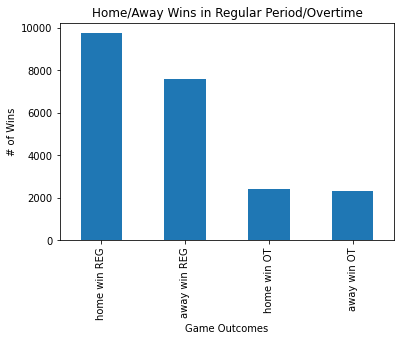

In [96]:
game.outcome.value_counts().plot(kind='bar')
plt.xlabel('Game Outcomes')
plt.ylabel('# of Wins')
plt.title('Home/Away Wins in Regular Period/Overtime')
plt.show()

Most games are won by the homae team in regular periods. Overtime winnings between home and away teams are similar.

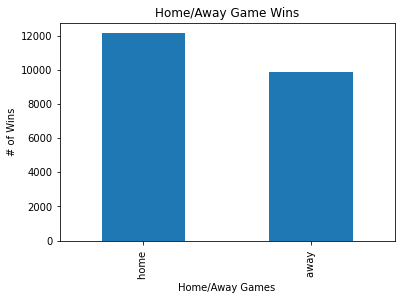

In [97]:
game.outcome.str[:5].value_counts().plot(kind='bar')
plt.xlabel('Home/Away Games')
plt.ylabel('# of Wins')
plt.title('Home/Away Game Wins')
plt.show()

More games are won by the home team

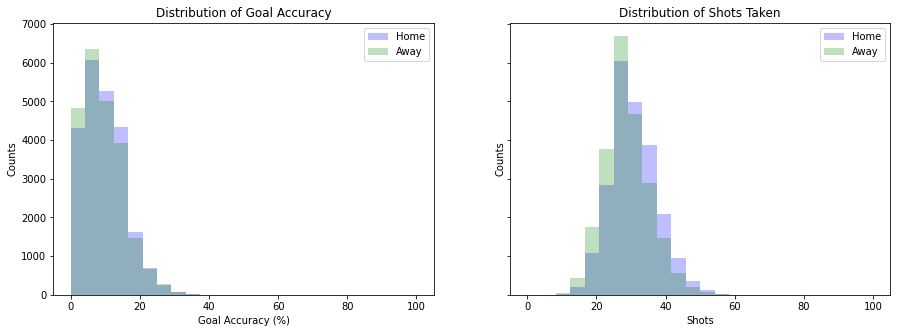

In [98]:
game_teams_stats['goal_pct']=game_teams_stats.goals/game_teams_stats.shots*100

fig, (ax1, ax2)=plt.subplots(1,2, sharey=True, sharex=True, figsize=(15, 5))

bins=np.linspace(0, 100,25)
ax1.hist(game_teams_stats.loc[game_teams_stats.HoA=="home"].goal_pct, alpha=0.25, label='Home', bins=bins, color='blue')
ax1.hist(game_teams_stats.loc[game_teams_stats.HoA=="away"].goal_pct, alpha=0.25, label='Away', bins=bins, color='green')

ax2.hist(game_teams_stats.loc[game_teams_stats.HoA=="home"].shots, alpha=0.25, label='Home', bins=bins, color='blue')
ax2.hist(game_teams_stats.loc[game_teams_stats.HoA=="away"].shots, alpha=0.25, label='Away', bins=bins, color='green')
ax1.legend()
ax1.set_xlabel("Goal Accuracy (%)")
ax1.set_ylabel("Counts")
ax2.legend()
ax2.set_xlabel("Shots")
ax2.set_ylabel("Counts")

ax1.set_title("Distribution of Goal Accuracy")
ax2.set_title("Distribution of Shots Taken")
plt.show()

Home teams have tend to have higher goal accuracies but take more shots per game.

In [99]:
away_team_stats=game_teams_stats.loc[game_teams_stats['HoA']=='away'].drop(columns=['head_coach', 'goals', 'HoA'])
away_team_stats.head()

,game_id,team_id,won,settled_in,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,goal_pct
0,2016020045,4,False,REG,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,14.814815
2,2017020812,24,True,OT,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,11.764706
4,2015020314,21,True,REG,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,13.793103
6,2015020849,52,False,REG,21.0,21.0,10.0,4.0,0.0,31.4,4.0,14.0,16.0,left,4.761905
8,2017020586,20,False,REG,23.0,20.0,19.0,3.0,0.0,54.7,10.0,4.0,7.0,right,4.347826


In [100]:
home_team_stats=game_teams_stats.loc[game_teams_stats['HoA']=='home'].drop(columns=['head_coach', 'goals', 'HoA'])
home_team_stats.head()

,game_id,team_id,won,settled_in,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,goal_pct
1,2016020045,16,True,REG,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,25.000000
3,2017020812,7,False,OT,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,9.090909
5,2015020314,52,False,REG,21.0,22.0,11.0,2.0,0.0,54.3,13.0,7.0,9.0,left,4.761905
7,2015020849,12,True,REG,29.0,16.0,8.0,5.0,2.0,68.6,12.0,11.0,13.0,left,6.896552
9,2017020586,24,True,REG,41.0,15.0,13.0,6.0,1.0,45.3,13.0,4.0,21.0,right,4.878049


Filter game_teams_stats for home and away games to analyze individually.

In [101]:
team_stats=game_teams_stats.drop(columns=['game_id', 'team_id', 'head_coach'])
team_stats['home']=team_stats.HoA.apply(lambda x: True if x=="home" else False)
team_stats.head()

,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,goal_pct,home
0,away,False,REG,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,14.814815,False
1,home,True,REG,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,25.000000,True
2,away,True,OT,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,11.764706,False
3,home,False,OT,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,9.090909,True
4,away,True,REG,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,13.793103,False


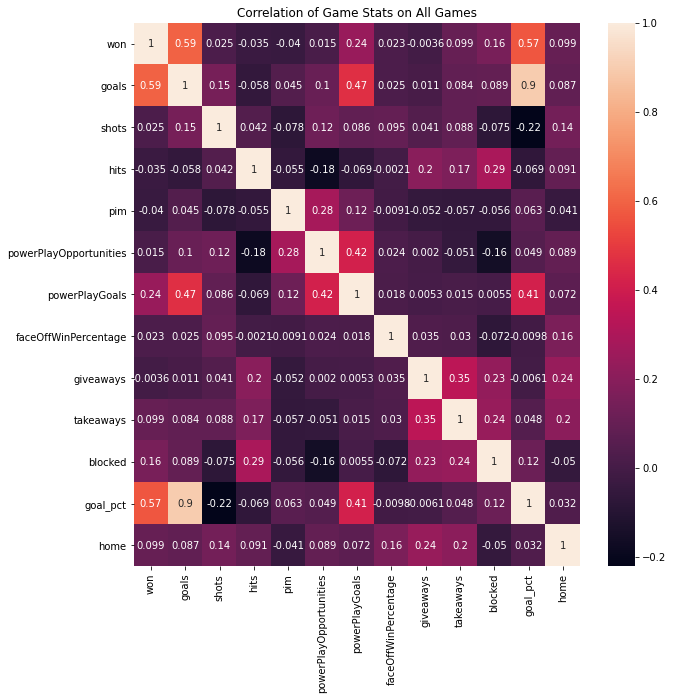

In [102]:
plt.figure(figsize=(10,10))
sns.heatmap(team_stats.corr(), annot=True)
plt.title('Correlation of Game Stats on All Games')
plt.show()

Looking at stats for all games, being the home game is positively correlated to probability of winning. However, the coefficient is only 0.099 and is statistically negligble. Winning is more correlated with goals and the amount of power play goals, which is to be expected.

More games are won by the home team but perhaps this is related to other factors. We will examine the correlation of game factors individually between home and away teams.

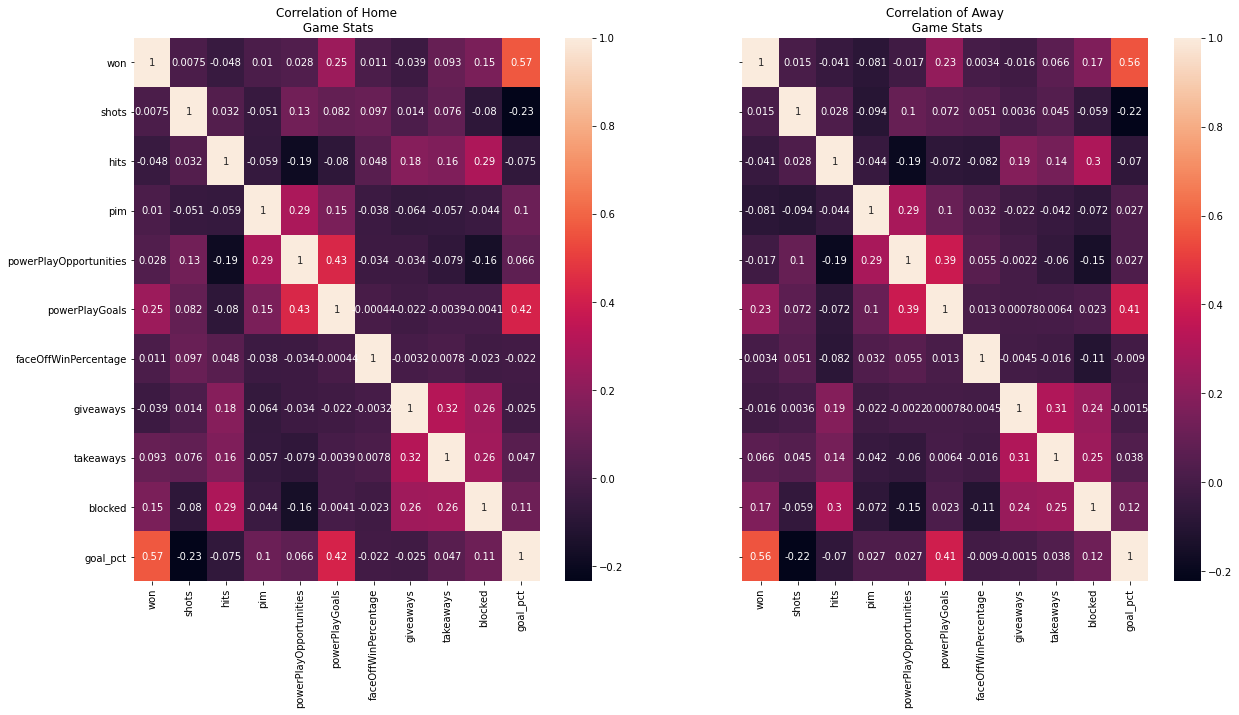

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20, 10))
sns.heatmap(home_team_stats.drop(columns=['game_id', 'team_id']).corr(), ax=ax1, annot=True)
ax1.title.set_text('Correlation of Home\n Game Stats')
sns.heatmap(away_team_stats.drop(columns=['game_id', 'team_id']).corr(), ax=ax2, annot=True)
ax2.title.set_text('Correlation of Away\n Game Stats')
plt.show()

We can see from the above two correlation heatmaps that the amount of power play goals is positively correlated to power play opportunities, which is to be expected. However there is a slightly higher correlation between wins and power play opportunities for home games than away games. Combined with a higher correlation coefficient between take aways vs wins, lower correlation between blocked and wins, compared to that of away games, it seems that the home team plays more aggressively. This aligns with the observation drawn from comparisons of histograms above of goal accuracy and shots taken for home and away games.

### Effect of Goalie Statistics

Inspect dataframes and merge game_goalie_stats with game on game_id to combine goalie statistics with other team statistics for each game.

In [104]:
game_goalie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889


In [105]:
game.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [106]:
goalie_stats=game_goalie_stats.merge(game, on='game_id')

Drop rows for tied games, map team goals to dataframe.

In [107]:
goalie_stats=goalie_stats[~goalie_stats.outcome.str.contains('tbc')]
goalie_stats['HoA']=np.where(goalie_stats.team_id==goalie_stats.home_team_id, 'home', 'away')
#true = home, false = away
goalie_stats['team_goals']=np.where(goalie_stats.HoA=='home', goalie_stats.home_goals, \
                                       goalie_stats.away_goals)

goalie_stats['won']=np.where((goalie_stats.outcome.str.contains('home') & \
                                 goalie_stats.HoA.str.contains('home')) | \
                                (goalie_stats.outcome.str.contains('away') & \
                                 goalie_stats.HoA.str.contains('away')), True, False)

goalie_stats['settled']=goalie_stats.outcome.apply(lambda x: "REG" if "REG" in x else "OT")

In [108]:
goalie_stats.isna().sum()

game_id                          0
player_id                        0
team_id                          0
timeOnIce                        0
assists                          0
goals                            0
pim                              0
shots                            0
saves                            0
powerPlaySaves                   0
shortHandedSaves                 0
evenSaves                        0
shortHandedShotsAgainst          0
evenShotsAgainst                 0
powerPlayShotsAgainst            0
decision                      3489
savePercentage                 118
powerPlaySavePercentage       3919
evenStrengthSavePercentage     172
season                           0
type                             0
date_time_GMT                    0
away_team_id                     0
home_team_id                     0
away_goals                       0
home_goals                       0
outcome                          0
home_rink_side_start             0
venue               

Review rows that are missing decision information

In [109]:
goalie_decision_na=goalie_stats.loc[goalie_stats.decision.isna()]
goalie_decision_na.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,...,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,HoA,team_goals,won,settled
0,2016020045,8473607,4,1504,0,0,0,16,12,1,...,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,away,4,False,REG
17,2017020240,8473499,24,512,0,0,0,6,6,4,...,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT,home,4,True,REG
44,2016020716,8476914,29,781,0,0,0,5,5,0,...,left,Barclays Center,/api/v1/venues/null,America/New_York,-4,EDT,away,2,False,REG
48,2017020001,8476945,52,1164,0,0,0,11,9,6,...,right,Bell MTS Place,/api/v1/venues/null,America/Winnipeg,-5,CDT,home,2,False,REG
126,2016020674,8477225,17,530,0,0,0,8,5,2,...,right,Joe Louis Arena,/api/v1/venues/null,America/Detroit,-4,EDT,home,6,True,OT


In [110]:
goalie_stats[goalie_stats.game_id.isin(goalie_decision_na.game_id)]

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,...,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,HoA,team_goals,won,settled
0,2016020045,8473607,4,1504,0,0,0,16,12,1,...,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,away,4,False,REG
1,2016020045,8473461,4,2011,0,0,0,11,9,1,...,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,away,4,False,REG
2,2016020045,8470645,16,3598,0,0,0,27,23,2,...,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT,home,7,True,REG
15,2017020240,8474593,23,3600,0,0,0,35,31,4,...,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT,away,1,False,REG
16,2017020240,8468011,24,3084,0,0,0,14,13,1,...,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT,home,4,True,REG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47544,2018030236,8471418,25,665,0,0,0,5,5,1,...,right,American Airlines Center,/api/v1/venues/5019,America/Chicago,-5,CDT,home,1,False,REG
47545,2018030236,8471750,25,2890,0,0,0,20,16,4,...,right,American Airlines Center,/api/v1/venues/5019,America/Chicago,-5,CDT,home,1,False,REG
47578,2018030413,8471695,6,3600,0,0,0,29,27,7,...,left,Enterprise Center,/api/v1/venues/5076,America/Chicago,-5,CDT,away,7,True,REG
47579,2018030413,8474596,19,1468,0,0,0,4,3,0,...,left,Enterprise Center,/api/v1/venues/5076,America/Chicago,-5,CDT,home,2,False,REG


Rows where decision is null refers to games where one team had multiple goalies. It's difficult to compare these games with ones with a single goalie, so we will drop those rows. Drop redundant/unhelpful columns as well.

In [111]:
goalie_stats=goalie_stats[~goalie_stats.game_id.isin(goalie_decision_na.game_id)]
goalie_stats.drop(columns=['venue', 'venue_link', 'venue_time_zone_id', 'date_time_GMT', 'venue_time_zone_offset', 'venue_time_zone_tz', 'team_id','away_team_id', 'home_team_id', 'home_goals', 'away_goals'], axis=1, inplace=True)

Filter data for games won and lost to further analyze.

In [112]:
#winning games
winning_goalie_stats=goalie_stats.loc[goalie_stats.won==True]
winning_goalie_stats.drop(columns=['won'], axis=1, inplace=True)
winning_goalie_stats.head()

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,game_id,player_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,...,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,season,type,outcome,home_rink_side_start,HoA,team_goals,settled
3,2017020812,8468011,3696,0,0,0,33,30,1,2,...,90.909091,50.000000,96.428571,20172018,R,away win OT,left,away,4,OT
5,2015020314,8473575,3600,0,0,0,21,20,3,1,...,95.238095,100.000000,94.117647,20152016,R,away win REG,right,away,4,REG
8,2015020849,8475663,3600,0,0,0,21,20,1,1,...,95.238095,100.000000,94.736842,20152016,R,home win REG,right,home,2,REG
10,2017020586,8476434,3590,0,0,0,23,22,4,1,...,95.652174,100.000000,94.444444,20172018,R,home win REG,left,home,2,REG
11,2016020610,8474651,3600,0,0,0,23,22,2,0,...,95.652174,66.666667,100.000000,20162017,R,away win REG,right,away,4,REG


In [113]:
#losing games
losing_goalie_stats=goalie_stats.loc[goalie_stats.won==False]
losing_goalie_stats.drop(columns=['won'], axis=1, inplace=True)
losing_goalie_stats.head()

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,game_id,player_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,...,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,season,type,outcome,home_rink_side_start,HoA,team_goals,settled
4,2017020812,8475215,3539,0,0,0,33,29,4,1,...,87.878788,80.000000,88.888889,20172018,R,away win OT,left,home,3,OT
6,2015020314,8474636,3520,0,0,0,28,25,4,0,...,89.285714,80.000000,91.304348,20152016,R,away win REG,right,home,1,REG
7,2015020849,8471715,3475,0,0,0,29,27,8,1,...,93.103448,80.000000,100.000000,20152016,R,home win REG,right,away,1,REG
9,2017020586,8469608,3458,1,0,0,41,39,8,0,...,95.121951,88.888889,96.875000,20172018,R,home win REG,left,away,1,REG
12,2016020610,8471679,3576,0,0,0,39,35,5,0,...,89.743590,83.333333,90.909091,20162017,R,away win REG,right,home,1,REG


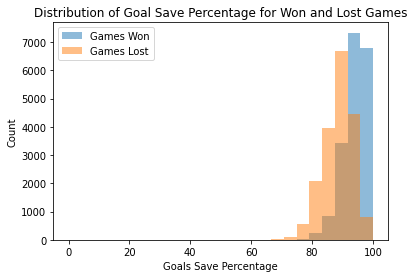

In [114]:
plt.hist(winning_goalie_stats.savePercentage.dropna(), bins=bins,alpha=0.5,  label="Games Won")
plt.hist(losing_goalie_stats.savePercentage.dropna(), bins=bins, alpha=0.5, label="Games Lost")
plt.legend()
plt.xlabel('Goals Save Percentage')
plt.ylabel('Count')
plt.title('Distribution of Goal Save Percentage for Won and Lost Games')
plt.show()

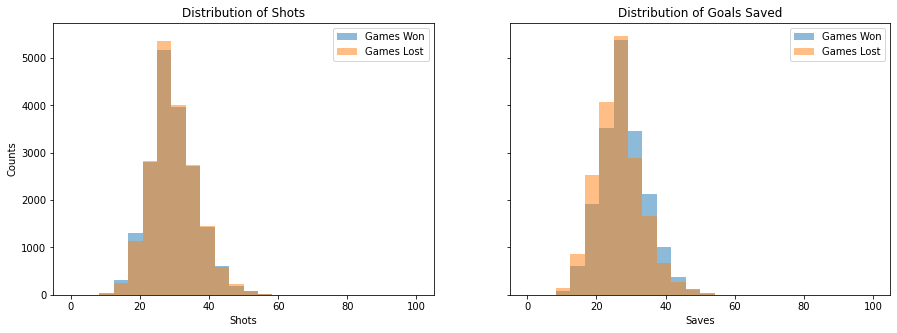

In [115]:
fig, (ax1, ax2)=plt.subplots(1,2,sharey=True, figsize=(15,5))
ax1.hist(winning_goalie_stats.shots, label='Games Won', alpha=0.5, bins=bins)
ax1.hist(losing_goalie_stats.shots, label='Games Lost', alpha=0.5, bins=bins)
ax2.hist(winning_goalie_stats.saves, label='Games Won', alpha=0.5, bins=bins)
ax2.hist(losing_goalie_stats.saves, label='Games Lost', alpha=0.5, bins=bins)
ax1.legend()
ax1.set_xlabel('Shots')
ax1.set_ylabel('Counts')
ax1.set_title('Distribution of Shots')
ax2.legend()
ax2.set_xlabel('Saves')
ax2.set_title('Distribution of Goals Saved')
plt.show()

Shots made by both winning and losing teams were mostly similar; however, the winning team had more games with more saves.

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


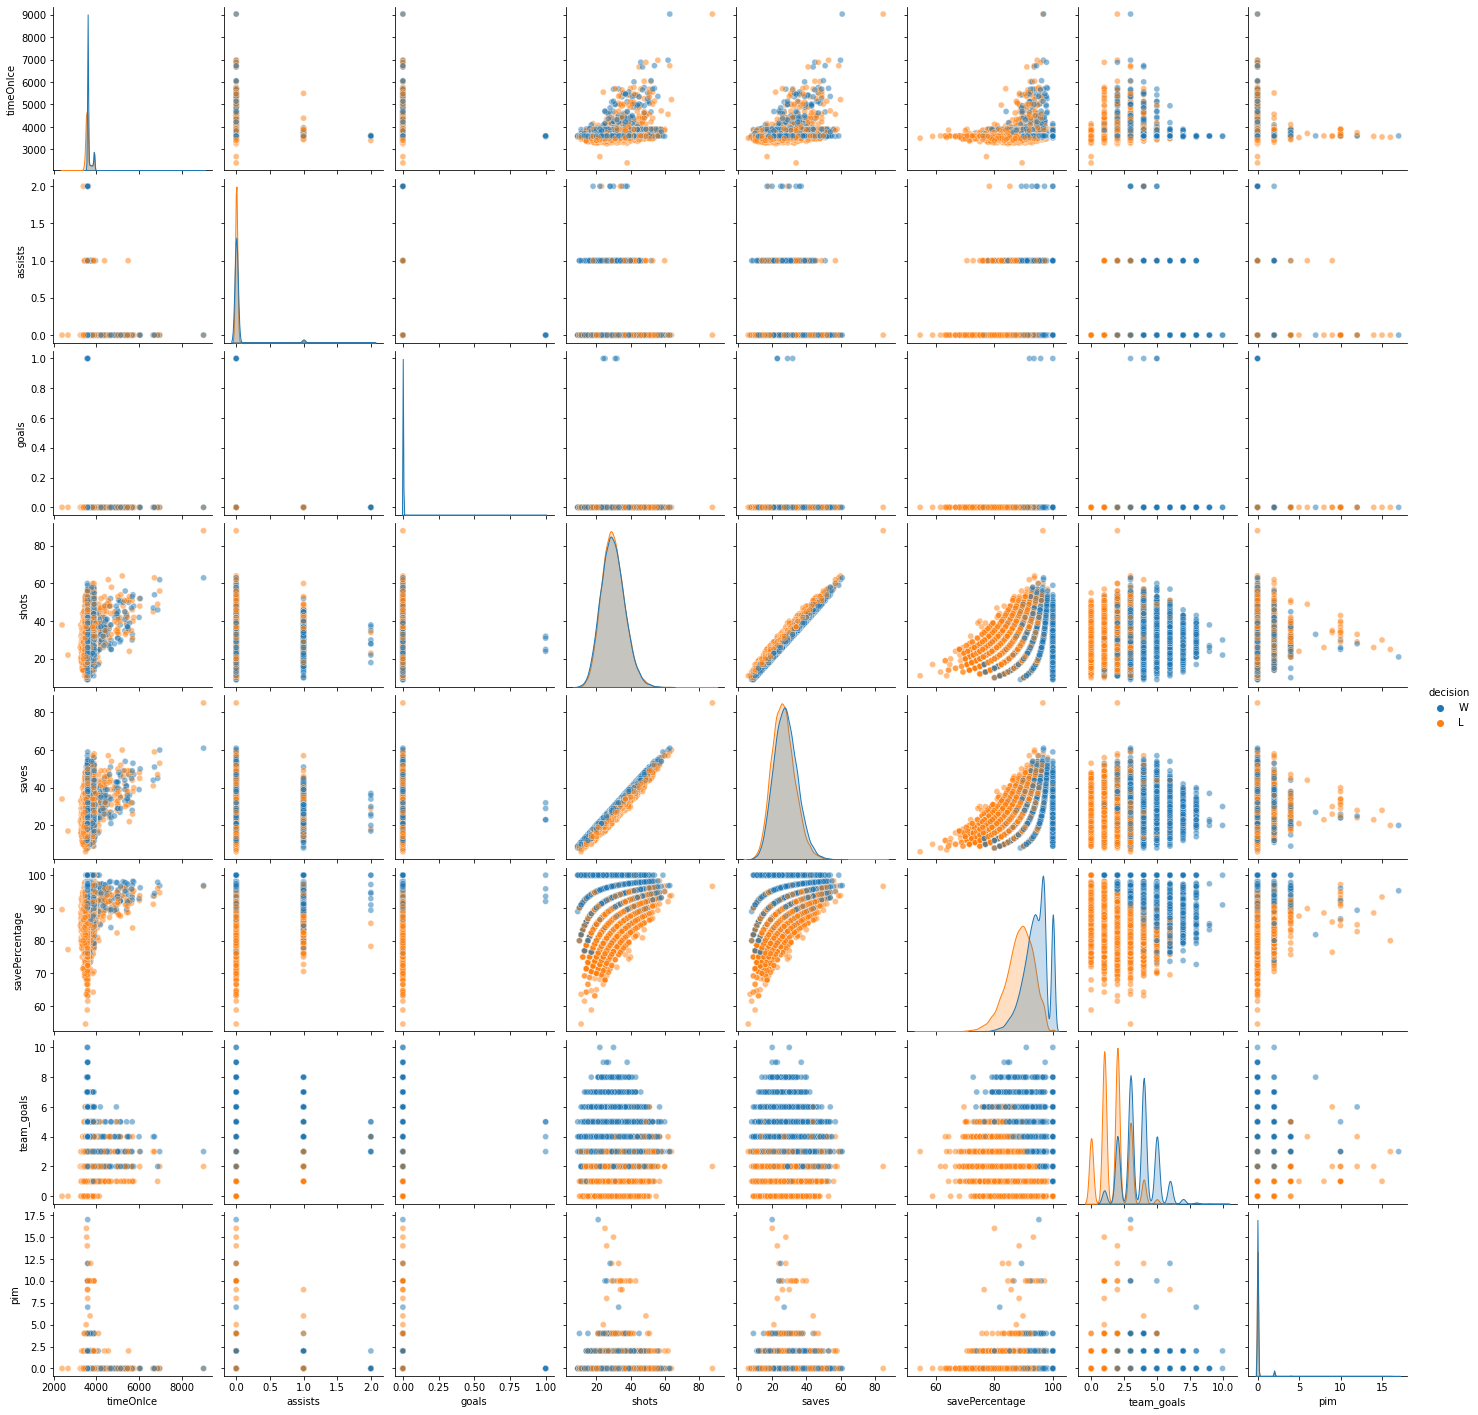

In [116]:
cols_to_plot=['timeOnIce', 'assists', 'goals', 'shots', 'saves','savePercentage', 'decision', 'team_goals', 'pim', 'type']
sns.pairplot(goalie_stats[cols_to_plot], plot_kws={'alpha':0.5}, hue='decision')
plt.show()

Conclusions that can be drawn from the above plots:
- Only winning team had the goalie score
- Goalies of winning teams spend more time on the ice
- Winning games had more assists
- Confirms winning games have a higher save percentage and team goals

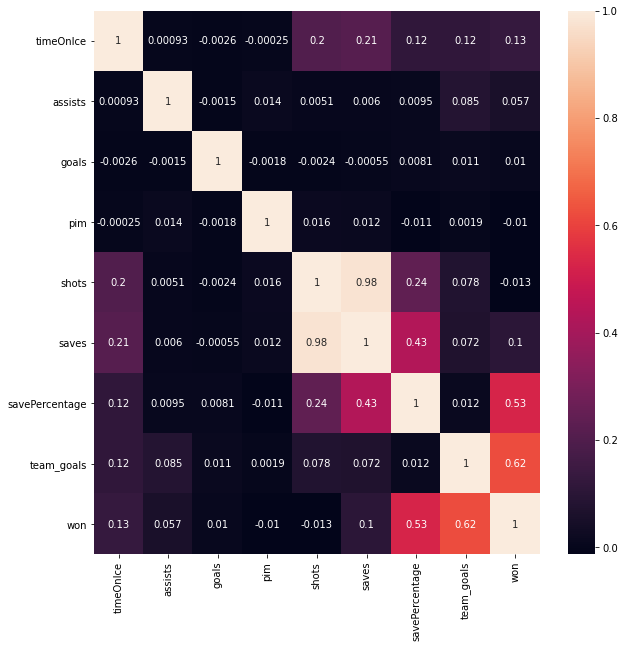

In [117]:
plt.figure(figsize=(10, 10))
goalie_corr_cols=['timeOnIce', 'assists', 'goals','pim', 'shots', 'saves', 'savePercentage', 'team_goals','won']
sns.heatmap(goalie_stats[goalie_corr_cols].corr(), annot=True)
plt.show()

The correlation matrix shows that after goals scored by the team, save percentage has the next highest correlation to winning. It may be possible that goalies with better goal saving abilities allow the rest of the team to focus on offense rather than defense, and therefore have a higher change of scoring and winning.

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


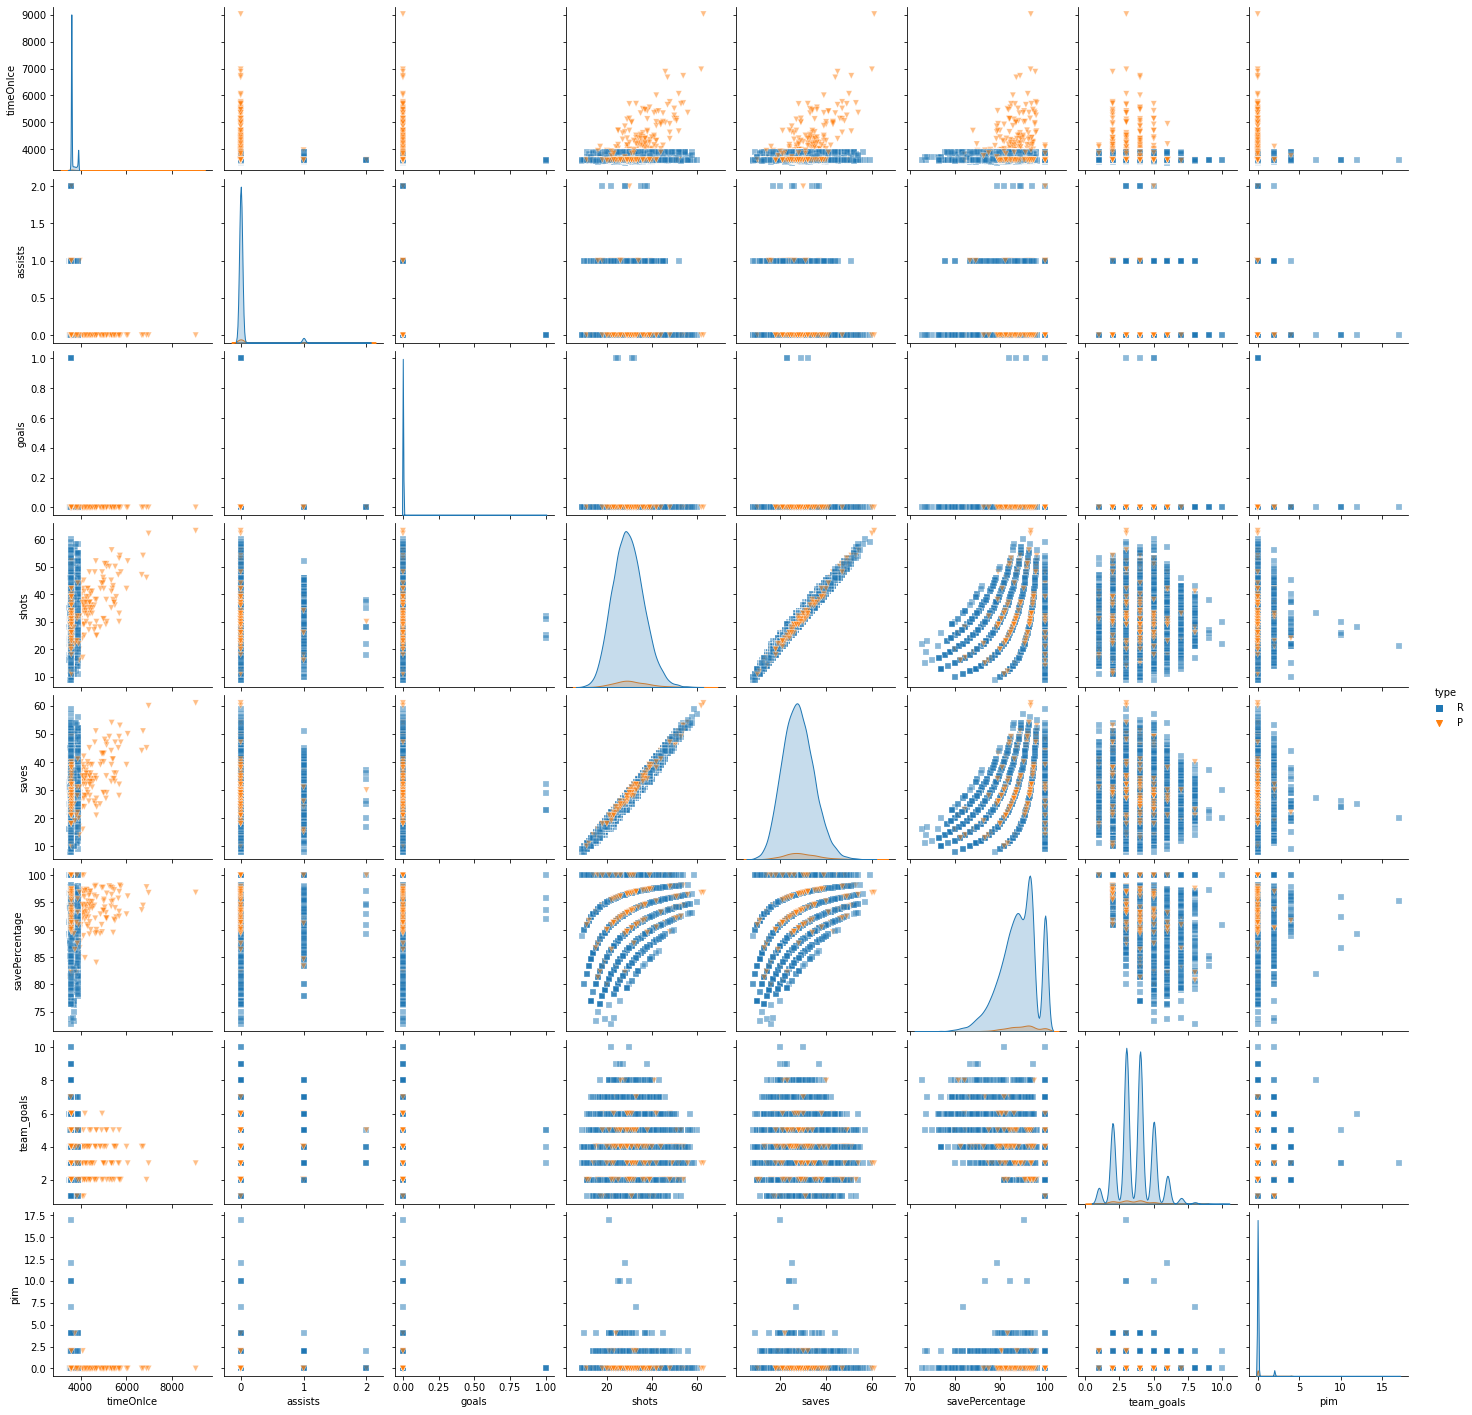

In [118]:
sns.pairplot(winning_goalie_stats[cols_to_plot], plot_kws={'alpha':0.5}, hue='type', markers=['s', 'v'])
plt.show()

For games won during playoffs, goalies tend to spend more time on the ice compared to regular games. Their save rates are higher, have fewer assists and goals. This may suggest that goalies are more risk averse during playoff games and more focused on goal tending.

### Analyzing Player Experience and Physique
First we're going to do some feature engineering on the features that we need for this analysis like height_cm, weight.

In [119]:
player_info['height_cm'].describe()

count    3901.000000
mean      185.718862
std         5.375089
min       162.560000
25%       182.880000
50%       185.420000
75%       187.960000
max       205.740000
Name: height_cm, dtype: float64

In [120]:
bins = [162, 180, 185, 190, 206]
bin_labels = ['[162_180)', '[180_185)', '[185_190)', '[190_206)']

player_info['height_cm_group']=pd.cut(player_info['height_cm'], bins, right=False, labels=bin_labels)
player_info.head()['height_cm_group']

0    [185_190)
1    [185_190)
2    [180_185)
3    [162_180)
4    [190_206)
Name: height_cm_group, dtype: category
Categories (4, object): ['[162_180)' < '[180_185)' < '[185_190)' < '[190_206)']

In [121]:
player_info['weight'].describe()

count    3901.000000
mean      200.617534
std        15.896729
min       140.000000
25%       190.000000
50%       200.000000
75%       210.000000
max       265.000000
Name: weight, dtype: float64

In [122]:
bins = [140, 185, 195, 205, 215, 270]
bin_labels = ['[140_185)', '[185_195)', '[195_205)', '[205_215)', '[215, 270)']

player_info['weight_group']=pd.cut(player_info['weight'], bins, right=False, labels=bin_labels)
player_info.head()['weight_group']

0     [205_215)
1     [205_215)
2     [140_185)
3     [185_195)
4    [215, 270)
Name: weight_group, dtype: category
Categories (5, object): ['[140_185)' < '[185_195)' < '[195_205)' < '[205_215)' < '[215, 270)']

In [123]:
def weight_to_height(x):
    height=x['height_cm']
    weight=x['weight']
    if (weight/height)<=1:
        return 'less_than_one'
    else:
        return 'more_than_one'

player_info['weight_to_height'] = player_info.apply(weight_to_height, axis=1)

In [124]:
player_info['birth_year'] = pd.to_datetime(player_info['birthDate']).dt.year

In [125]:
# extract year of game
player_info['game_year'] = pd.to_datetime(game['date_time_GMT']).dt.year

In [126]:
# Joining game_skater_stats, gplayer_info player_info tables.
game_skater_info = game_skater_stats.merge(game, on='game_id').merge(player_info, on='player_id')

# Joining game_goalie_stats, gplayer_info player_info tables.
game_goalie_info = game_goalie_stats.merge(game, on='game_id').merge(player_info, on='player_id')

In [127]:
game_skater_info.dropna(inplace=True)
game_skater_info.isna().sum().any()

False

In [128]:
game_skater_info.dropna(inplace=True)
game_skater_info.isna().sum().any()

False

In [129]:
game_goalie_info.dropna(inplace=True)
game_goalie_info.isna().sum().any()

False

In [130]:
# calculate player age
game_skater_info['player_age'] = game_skater_info['game_year'] - game_skater_info['birth_year']
game_goalie_info['player_age'] = game_goalie_info['game_year'] - game_goalie_info['birth_year']

In [131]:
# Replace ages < 18 with 18 (must be 18 or older to play in NHL)
game_skater_info['player_age'] = game_skater_info['player_age'].apply(lambda x: max(x, 18))
game_goalie_info['player_age'] = game_goalie_info['player_age'].apply(lambda x: max(x, 18))

In [132]:
game_skater_info['player_age'].describe()

count    783787.000000
mean         33.498005
std           7.611997
min          18.000000
25%          28.000000
50%          33.000000
75%          39.000000
max          57.000000
Name: player_age, dtype: float64

In [133]:
game_goalie_info['player_age'].describe()

count    40570.000000
mean        35.009514
std          6.959329
min         18.000000
25%         29.000000
50%         35.000000
75%         41.000000
max         56.000000
Name: player_age, dtype: float64

In [134]:
bins = [18, 25, 30, 35, 40, 45, 60]
bin_labels = ['[18_25)', '[25_30)', '[30_35)', '[35_40)', '[40, 45)', '[45, 60)']

game_skater_info['age_group']=pd.cut(game_skater_info['player_age'], bins, right=False, labels=bin_labels)
game_goalie_info['age_group']=pd.cut(game_goalie_info['player_age'], bins, right=False, labels=bin_labels)

In [135]:
def won_or_lost(x):
    player_team = x['team_id']
    home_team = x['home_team_id']
    away_team = x['away_team_id']
    outcome = x['outcome']
    if player_team == home_team:
        if 'home' in outcome:
            return 1
        else:
            return 0
    elif player_team == away_team:
        if 'home' in outcome:
            return 0
        else:
            return 1
    else:
        print("ERROR")
        
game_skater_info['won_or_lost'] = game_skater_info.apply(won_or_lost, axis=1)
game_goalie_info['won_or_lost'] = game_goalie_info.apply(won_or_lost, axis=1)

In [136]:
game_skater_info.drop(columns=['venue', 'venue_link', 'venue_time_zone_id', 'venue_time_zone_offset'
                               , 'venue_time_zone_tz', 'firstName', 'lastName'], inplace=True)
game_goalie_info.drop(columns=['venue', 'venue_link', 'venue_time_zone_id', 'venue_time_zone_offset'
                               , 'venue_time_zone_tz', 'firstName', 'lastName'], inplace=True)

In [137]:
game_skater_info.isna().sum().any()

False

In [138]:
game_goalie_info.isna().sum().any()

False

Now that we have the feature that we need, we can see their effects on the result of the game.<br/>
First we will see if physique and experience, has any effects on each player's winning rate.<br/>
Physique and experience effects on the skaters.

Text(0, 0.5, 'winning rate')

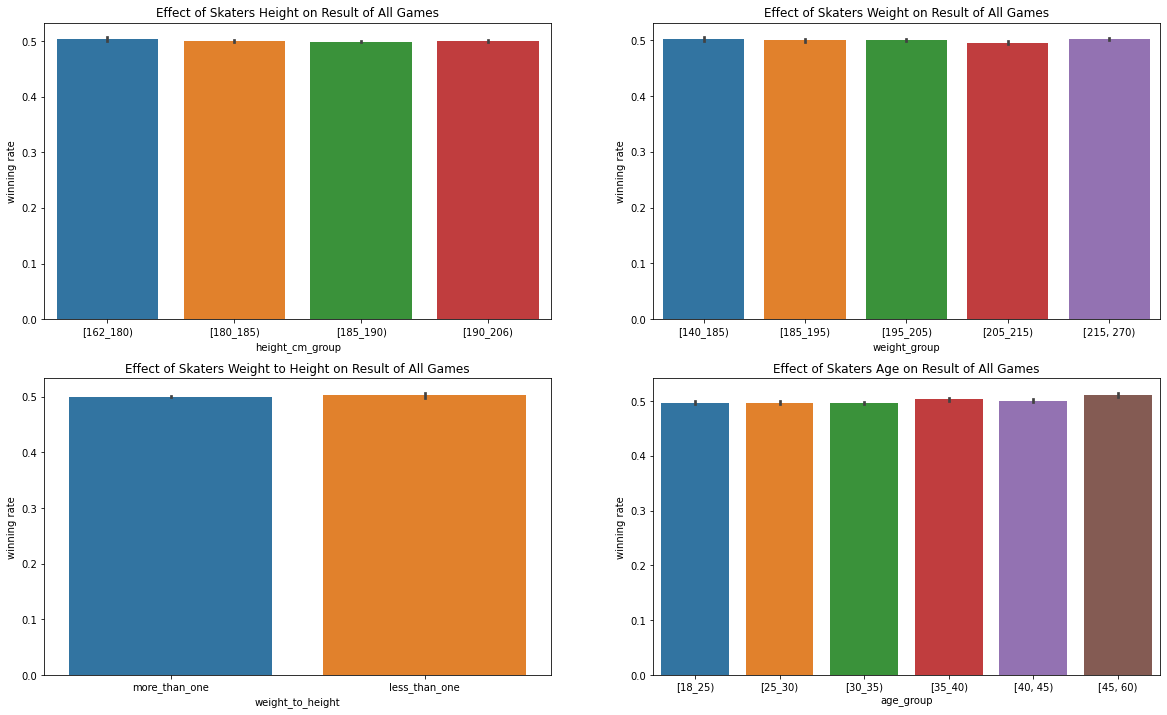

In [139]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,12))
sns.barplot(y=game_skater_info['won_or_lost'], x=game_skater_info['height_cm_group'], data=game_skater_info, ax=axs[0][0])
axs[0][0].title.set_text('Effect of Skaters Height on Result of All Games')
axs[0][0].set_ylabel('winning rate')
sns.barplot(y=game_skater_info['won_or_lost'], x=game_skater_info['weight_group'], data=game_skater_info, ax=axs[0][1])
axs[0][1].title.set_text('Effect of Skaters Weight on Result of All Games')
axs[0][1].set_ylabel('winning rate')
sns.barplot(y=game_skater_info['won_or_lost'], x=game_skater_info['weight_to_height'], data=game_skater_info, ax=axs[1][0])
axs[1][0].title.set_text('Effect of Skaters Weight to Height on Result of All Games')
axs[1][0].set_ylabel('winning rate')
sns.barplot(y=game_skater_info['won_or_lost'], x=game_skater_info['age_group'], data=game_skater_info, ax=axs[1][1])
axs[1][1].title.set_text('Effect of Skaters Age on Result of All Games')
axs[1][1].set_ylabel('winning rate')

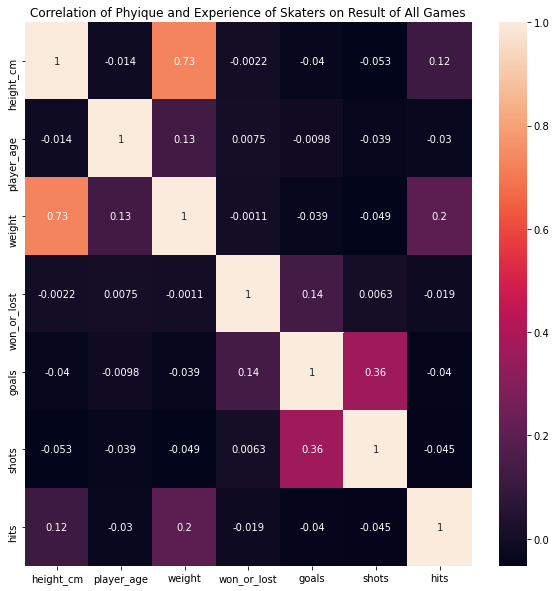

In [140]:
find_corr=['height_cm','player_age', 'weight', 'won_or_lost', 'goals', 'shots', 'hits']
plt.figure(figsize=(10, 10))
sns.heatmap(game_skater_info[find_corr].corr(), annot=True)
plt.title('Correlation of Phyique and Experience of Skaters on Result of All Games')
plt.show()

Now we're going to see the physique and experience effects on the goalies.

Text(0, 0.5, 'winning rate')

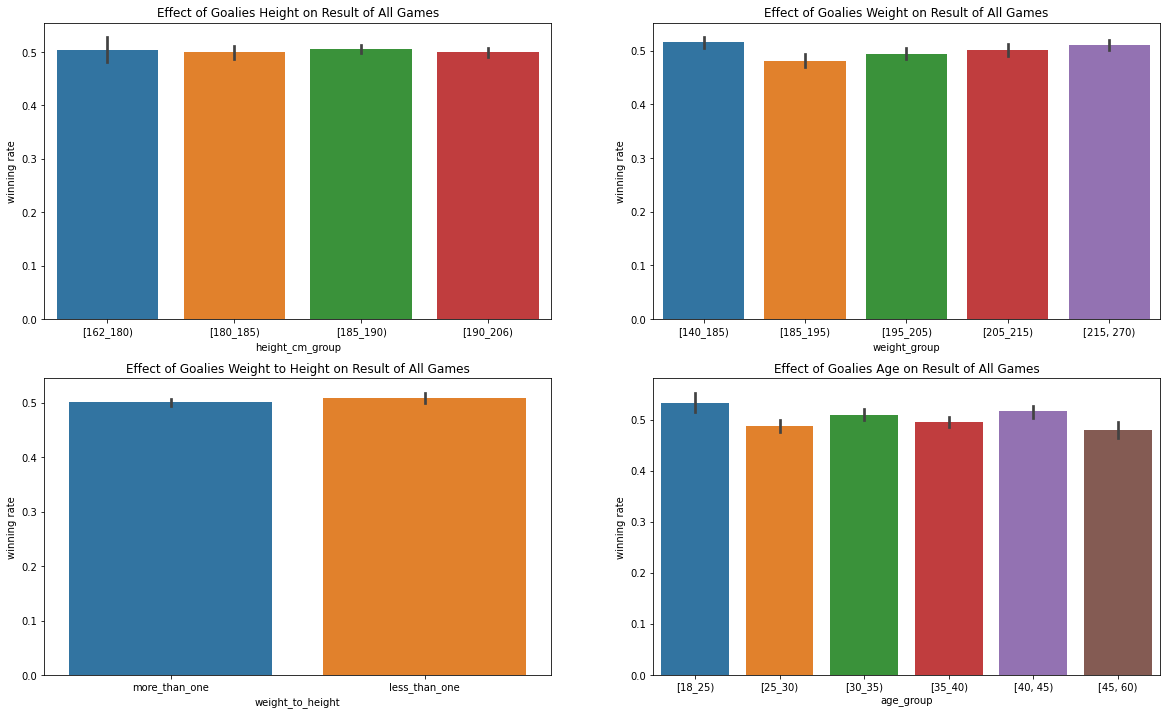

In [141]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,12))
sns.barplot(y=game_goalie_info['won_or_lost'], x=game_goalie_info['height_cm_group'], data=game_goalie_info, ax=axs[0][0])
axs[0][0].title.set_text('Effect of Goalies Height on Result of All Games')
axs[0][0].set_ylabel('winning rate')
sns.barplot(y=game_goalie_info['won_or_lost'], x=game_goalie_info['weight_group'], data=game_goalie_info, ax=axs[0][1])
axs[0][1].title.set_text('Effect of Goalies Weight on Result of All Games')
axs[0][1].set_ylabel('winning rate')
sns.barplot(y=game_goalie_info['won_or_lost'], x=game_goalie_info['weight_to_height'], data=game_goalie_info, ax=axs[1][0])
axs[1][0].title.set_text('Effect of Goalies Weight to Height on Result of All Games')
axs[1][0].set_ylabel('winning rate')
sns.barplot(y=game_goalie_info['won_or_lost'], x=game_goalie_info['age_group'], data=game_goalie_info, ax=axs[1][1])
axs[1][1].title.set_text('Effect of Goalies Age on Result of All Games')
axs[1][1].set_ylabel('winning rate')

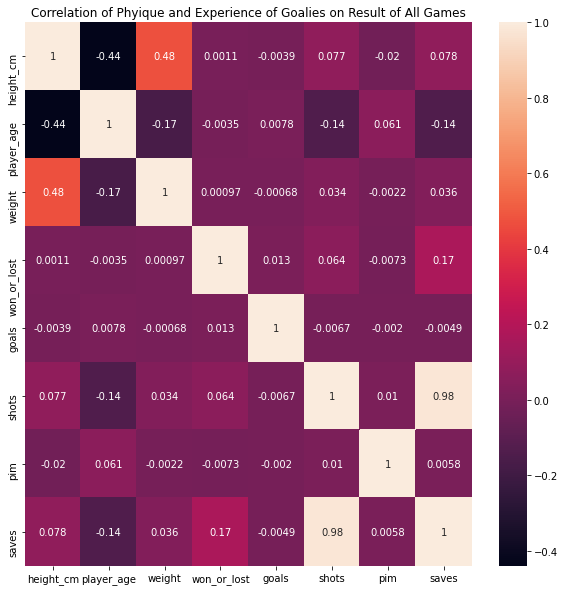

In [142]:
find_corr=['height_cm','player_age', 'weight', 'won_or_lost', 'goals', 'shots', 'pim', 'saves']
plt.figure(figsize=(10, 10))
sns.heatmap(game_goalie_info[find_corr].corr(), annot=True)
plt.title('Correlation of Phyique and Experience of Goalies on Result of All Games')
plt.show()

As you can see, we can say that there is almost no corrolation between player's physique and experience and player's wining rate.<br/>

## Defense stats Analysis.
Questions:
- Are winning team more offensive or defensive?
- Known hypotesis from previous analayis - teams with higher golie saves tend to be more offensive.

Attributes considered:
Hits - Counts the number of times a player gives a hit or check where his opponent has had possession of the puck and then has lost it.
Blocks - Blocked Shot is an attempted shot on the net that is prevented from reaching the net due to being blocked or deflected by an opponent other than the goalkeeper.
Takeaways - Number of times the player takes the puck away from the opposition.
Giveaways - Number of unforced turnovers made by the player.
Powerplay - Play where the player's team has more players on the ice than their opponent due to penalties.
pim - Cumulative total of time that a player has spent in the penalty box due to on ice infractions and is calculated by game and by season.
Shots -  A shot in ice hockey is an attempt by a player to score a goal by striking or snapping the puck with their stick in the direction of the net.


In [143]:
#Step 1: 
#Add seasons column in the game team stats.
print(game.columns,game.columns.shape)
game.head()

Index(['game_id', 'season', 'type', 'date_time_GMT', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object') (15,)


,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [144]:
#Add a new column for season, based on game ID.
game_teams_seasonal_stats = game_teams_stats.assign(season=game_teams_stats.game_id.map(game.set_index('game_id').season))
cols = game_teams_seasonal_stats.columns.tolist()
cols = ['game_id','season', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'startRinkSide', 'goal_pct']
game_teams_seasonal_stats = game_teams_seasonal_stats[cols]

In [145]:
#Drop the older game without season 
game_teams_seasonal_stats.isnull().values.any()
game_teams_seasonal_stats = game_teams_seasonal_stats.dropna()

In [146]:
#season wise corelation data:
seasons = game_teams_seasonal_stats["season"].unique()
seasons = sorted(seasons)
print(seasons)

[20002001.0, 20012002.0, 20022003.0, 20032004.0, 20052006.0, 20062007.0, 20072008.0, 20082009.0, 20092010.0, 20102011.0, 20112012.0, 20122013.0, 20132014.0, 20142015.0, 20152016.0, 20162017.0, 20172018.0, 20182019.0, 20192020.0]


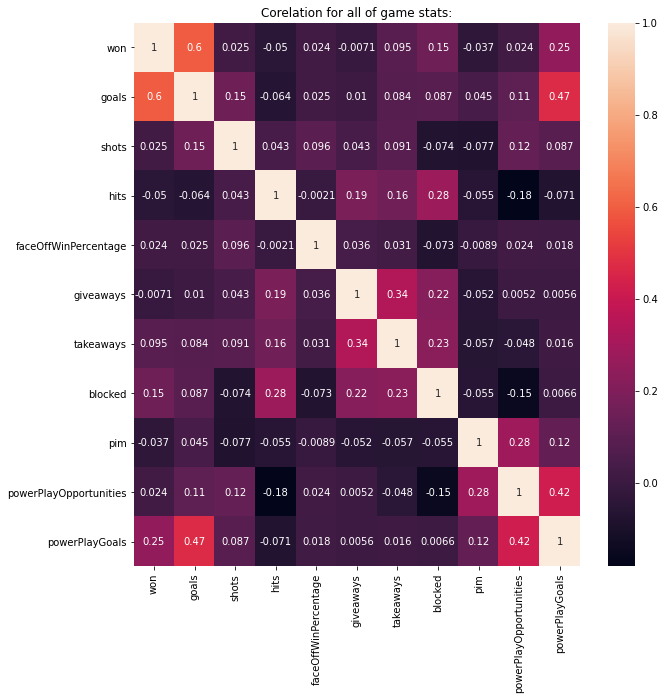

In [147]:
#Co-relation for all teams, all seasons.
corr_cols = ["won","goals","shots","hits","faceOffWinPercentage","giveaways","takeaways","blocked","pim","powerPlayOpportunities","powerPlayGoals"]
plt.figure(figsize=(10, 10))
sns.heatmap(game_teams_seasonal_stats[corr_cols].corr(), annot=True)
plt.title('Corelation for all of game stats:')
plt.show()

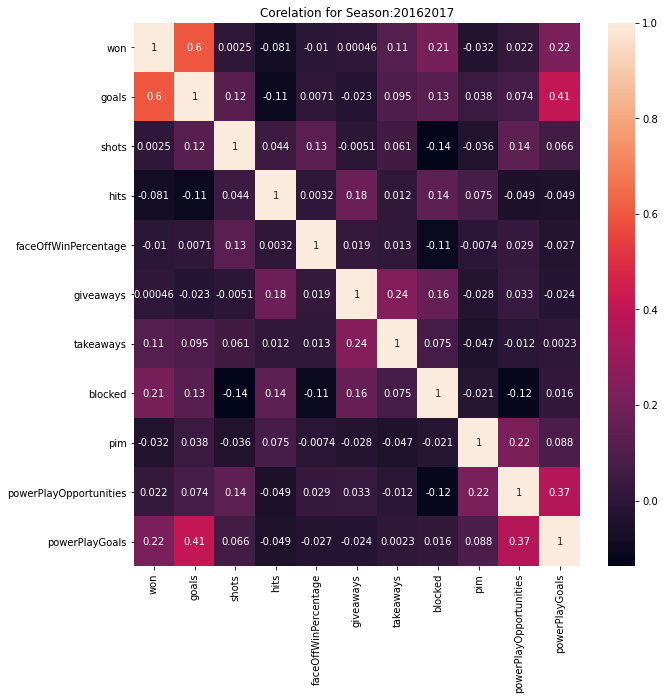

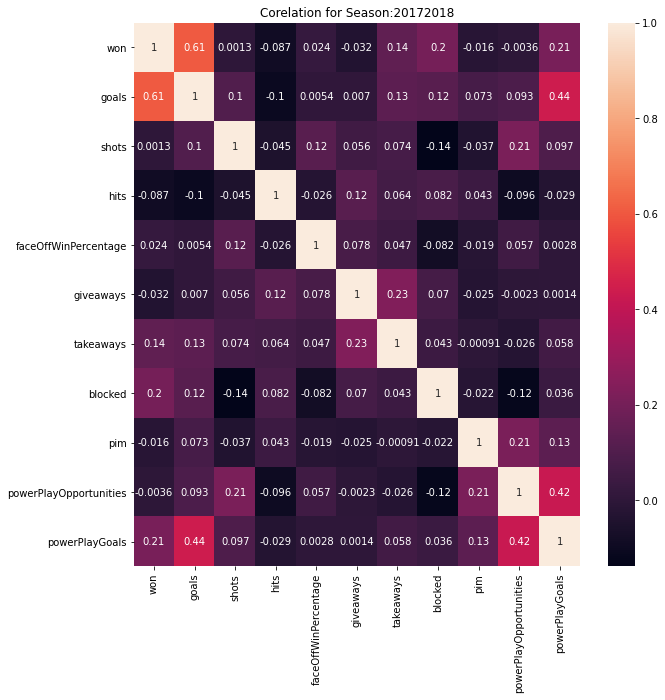

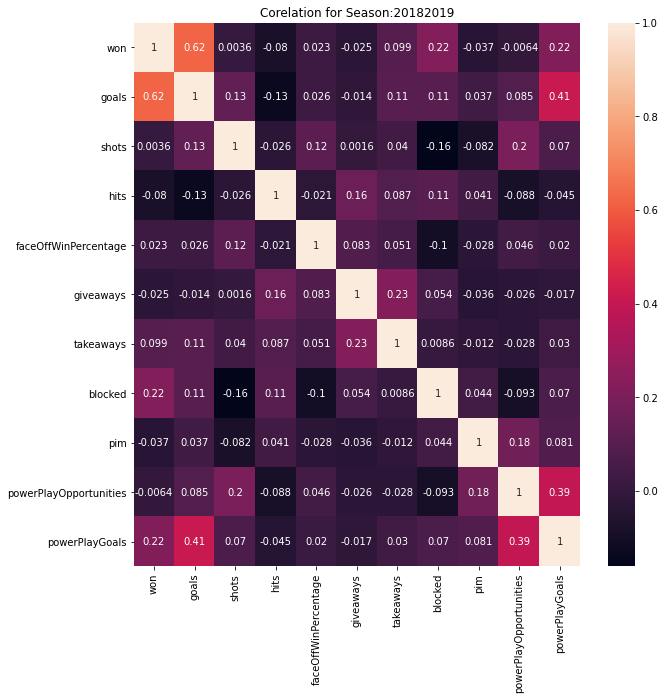

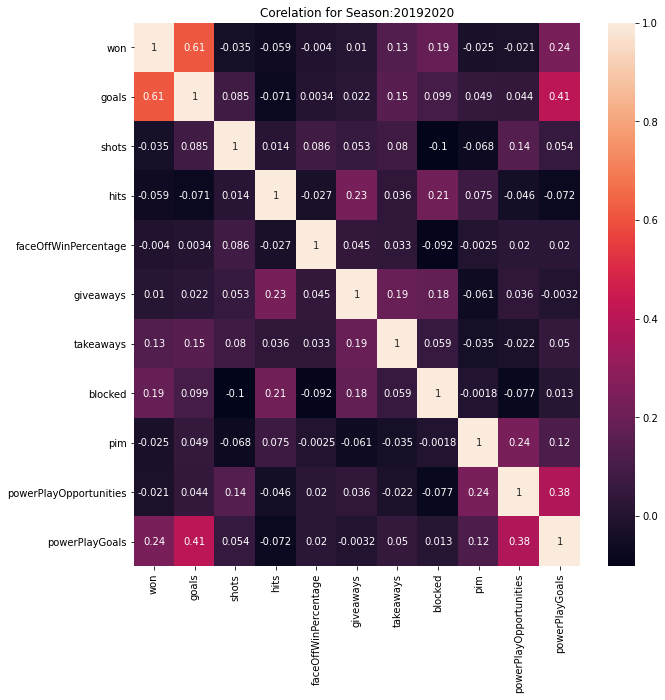

In [148]:
# heat map based on last 4 seasons to see how gameplay and corelations change.
#Todo: Reduce the number of graphs. Find a way to add animation to the heatmap so that its a single map with a season based slider.
for x in seasons[-4:]:
    plt.figure(figsize=(10, 10))
    sns.heatmap(game_teams_seasonal_stats.loc[(game_teams_seasonal_stats["season"] == x)] [corr_cols].corr(), annot=True)
    plt.title('Corelation for Season:%1.0f' %x)
    plt.show()

Blocked and takeaways have a relatively good corelation with winning. Hits has a small negative co-relation with goals. We can Also see that increased granularity gives us slightly better correlation compared to the complete all games, all teams dataset.

In [149]:
#Identify the top co-relatede attributes.
c = game_teams_stats[corr_cols].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending =False)
print("top corelation values for season all are : \n",so[len(corr_cols)+1:len(corr_cols)+30:2])

top corelation values for season all are : 
 goals                   won                       0.594453
                        powerPlayGoals            0.467947
powerPlayGoals          powerPlayOpportunities    0.415938
takeaways               giveaways                 0.345627
hits                    blocked                   0.291032
pim                     powerPlayOpportunities    0.280660
powerPlayGoals          won                       0.243516
takeaways               blocked                   0.238562
blocked                 giveaways                 0.230396
giveaways               hits                      0.199387
powerPlayOpportunities  hits                      0.181637
hits                    takeaways                 0.166651
powerPlayOpportunities  blocked                   0.155919
won                     blocked                   0.155092
shots                   goals                     0.150375
dtype: float64


In [150]:
#Check corelation based on the teams, grouped by seasons
game_teams_seasonal_stats.groupby(["team_id","season"])["hits","goals","blocked","faceOffWinPercentage"].corr().tail()

<ipython-input-150-93931638e5ad>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  game_teams_seasonal_stats.groupby(["team_id","season"])["hits","goals","blocked","faceOffWinPercentage"].corr().tail()


hits     goals   blocked  \
team_id season                                                          
54      20182019.0 faceOffWinPercentage  0.189066  0.215546  0.017587   
        20192020.0 hits                  1.000000 -0.017206  0.152357   
                   goals                -0.017206  1.000000  0.084558   
                   blocked               0.152357  0.084558  1.000000   
                   faceOffWinPercentage -0.172584 -0.133116  0.265596   

                                         faceOffWinPercentage  
team_id season                                                 
54      20182019.0 faceOffWinPercentage              1.000000  
        20192020.0 hits                             -0.172584  
                   goals                            -0.133116  
                   blocked                           0.265596  
                   faceOffWinPercentage              1.000000

## Per Season analysis of game data

Seasons: 2016-17 
Winners: Pittsburgh Penguins ; team id = 5
Runner Up: Nashville Predators ; team id = 18

One of the worst performing teams (regular): 
Colorado Avalanche	; team id = 21

Season: 2015-16
Winners: Pittsburgh Penguins ; team id = 5
Runner Up: San Jose Sharks ; team id = 18

One of the Worst performing teams: 
Colorado Avalanche	; team id = 21

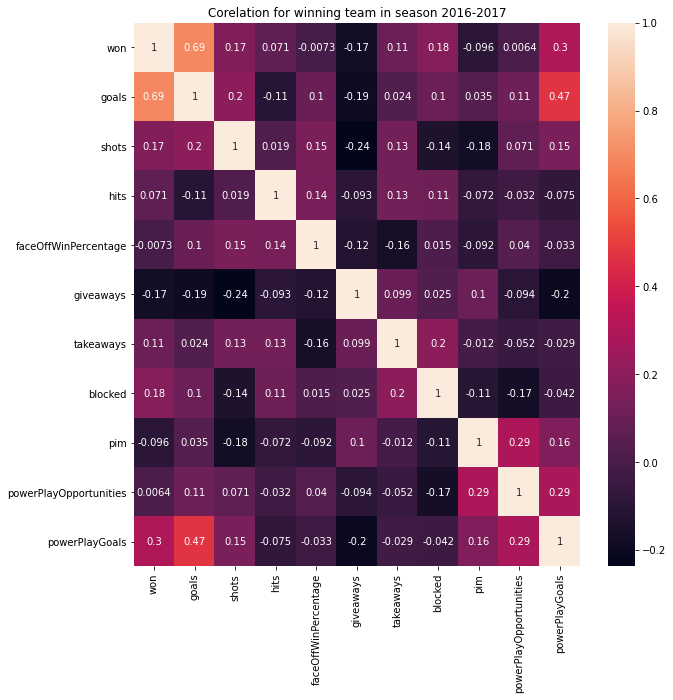

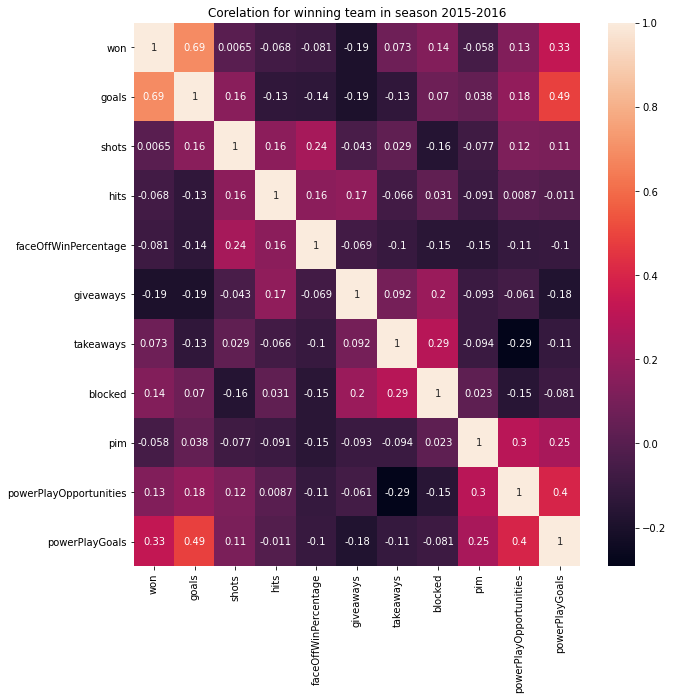

In [151]:
# Corelation for the two consecutive winners Pittsburgh Penguins
corr_cols = ["won","goals","shots","hits","faceOffWinPercentage","giveaways","takeaways","blocked","pim","powerPlayOpportunities","powerPlayGoals"]
plt.figure(figsize=(10, 10))
sns.heatmap( game_teams_seasonal_stats.loc[(game_teams_seasonal_stats["season"]==20162017.0) & (game_teams_seasonal_stats["team_id"] == 5)][corr_cols].corr(), annot=True)
plt.title('Corelation for winning team in season 2016-2017')
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap( game_teams_seasonal_stats.loc[(game_teams_seasonal_stats["season"]==20152016.0) & (game_teams_seasonal_stats["team_id"] == 5)][corr_cols].corr(), annot=True)
plt.title('Corelation for winning team in season 2015-2016')
plt.show()

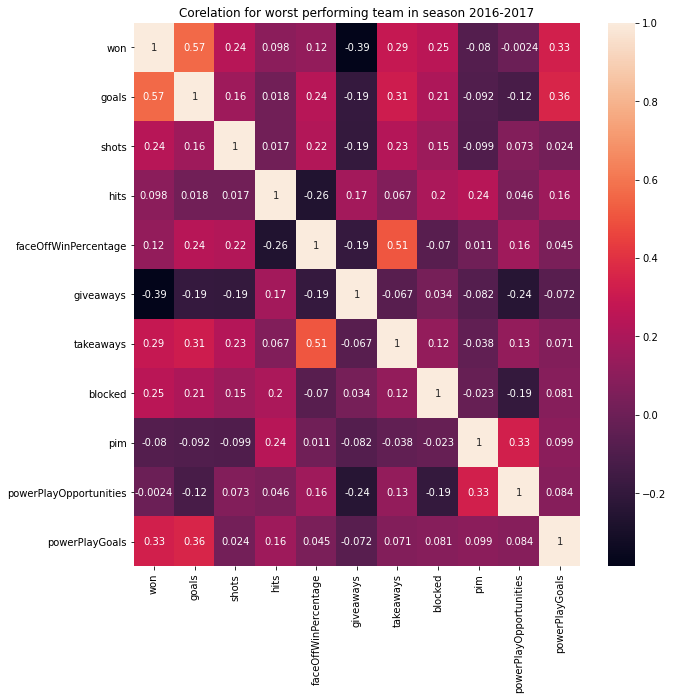

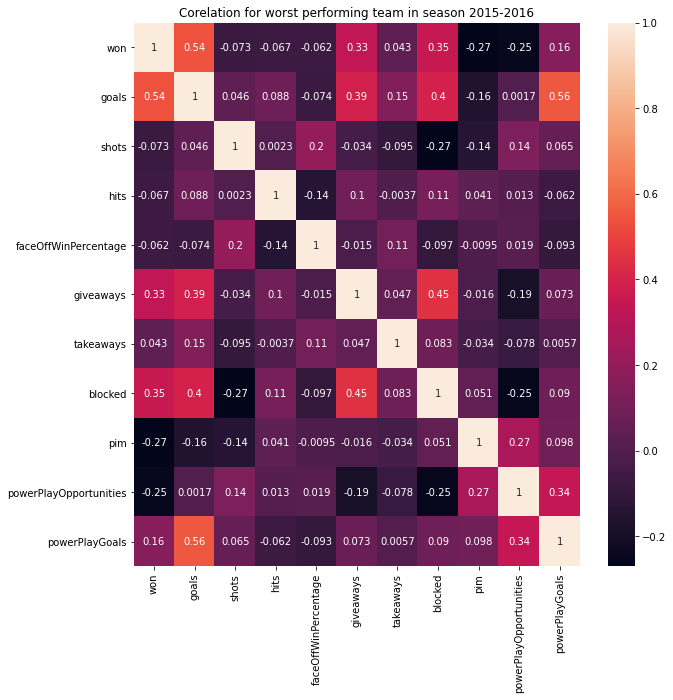

In [152]:
#Corelation for the team that did not perform well in same two season (15-16,16-17), Colorado Avalanche
plt.figure(figsize=(10, 10))
sns.heatmap( game_teams_seasonal_stats.loc[(game_teams_seasonal_stats["season"]==20162017.0) & (game_teams_seasonal_stats["team_id"] == 21)][corr_cols].corr(), annot=True)
plt.title('Corelation for worst performing team in season 2016-2017')
plt.show()
plt.figure(figsize=(10, 10))

sns.heatmap( game_teams_seasonal_stats.loc[(game_teams_seasonal_stats["season"]==20152016.0) & (game_teams_seasonal_stats["team_id"] == 21)][corr_cols].corr(), annot=True)
plt.title('Corelation for worst performing team in season 2015-2016')
plt.show()


Analysis: Key analysis from best and worst performing team of season 2016 - 2017

Key observation:Every season is different, and essentially every game is differnet. Very few stats co-relate with statistically signifant level even with same teams performing in similar fashion across two seasons.

Winning team:
- Winning team score more goals during powerplay (powerPlay Goals co-relation is higher by 1.1)
- Hits leading to takeaway ratio is much higher for winning team. This mean they are better at taking the puck away from the opposition team.
- Hits also result in much lower Penalty minutes for winning team.
- Blocks results in more takeaways.

Worst performing team:
- Suprisingly, takeaways are converted to goals better by the worst performing team. Meaning some goals matter more than others.
- Faceoff Win percentage is strongly co-related to takeaways. But hit do not result in takeaways.
- Slight more shots
- Hits to shots ratio is lower


## Machine learning model to predict a team’s chances of winning

In this section we use a Logistic Regression machine learning model to predict a team’s chances of winning against another team based on past performance and current game’s like home team advantage, defense stats.

Before creating the model, we dynamically build a dataframe that fetches past game stats for the two teams we want to predict the outcome of. 
The following new attributes are feature engineered: Rolling mean of powerplay goals, rolling mean of goals scored, rolling mean of goals conceded, previous win percentage against the opposition team.


In [153]:
#get list of unique teams in the dataset
teams = game_teams_seasonal_stats.team_id.unique()
#Add game id column and sort the DF by game id.
game_teams_seasonal_stats = game_teams_seasonal_stats.assign(type=game_teams_seasonal_stats.game_id.map(game.set_index('game_id').type))
game_teams_seasonal_stats = game_teams_seasonal_stats.sort_values(by ="game_id",ascending=True)
game_teams_seasonal_stats
#rearrange the column
cols = game_teams_seasonal_stats.columns.tolist()
cols = ['game_id','season','type', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'giveaways', 'takeaways', 'blocked', 'startRinkSide','goal_pct']
game_teams_seasonal_stats = game_teams_seasonal_stats[cols]
#Drop attributes not used in the analysis.
game_teams_seasonal_stats.drop(['head_coach','startRinkSide'], axis=1, inplace=True)
# Drop Na values since some older games have na values. 
game_teams_seasonal_stats.isnull().values.any()
game_teams_seasonal_stats = game_teams_seasonal_stats.dropna()

In [154]:
#create a map of team id and a dataframe with all the games played by that team.
game_teams_seasonal_stats
teams
individualTeamStats = {}
for x in teams:
    individualTeamStats[x]=game_teams_seasonal_stats.loc[game_teams_seasonal_stats.team_id == x]

Utility functions to make the ML model generic

In [155]:
#get gamestats from games that happened before gameId 
def getGameStats(teamId):
    df=individualTeamStats[teamId]
    df=df.sort_values(by ="game_id",ascending=False)
    df['isAwayTeam'] = pd.factorize(df['HoA'])[0]
    df.drop(["season","type","team_id","HoA","settled_in","goal_pct"],axis=1,inplace=True)
    df.set_index('game_id', inplace=True)
    df.columns = [str(teamId)+'_'+str(col) for col in df.columns]
    return df

#function returns a dataframe with a team's last 100 games.
# Todo: add exception and saftey checks for inputs.
def teamVersusStatHistory(teamIdOne,teamIdTwo):
    df1 = getGameStats(teamIdOne)
    df2 = getGameStats(teamIdTwo)
    versusGamesIds = game.loc[((game["away_team_id"] == teamIdOne) & (game["home_team_id"] == teamIdTwo)) | ((game["away_team_id"] == teamIdTwo) & (game["home_team_id"] == teamIdOne)) ,["game_id"]]
    df1 = df1[df1.index.isin(versusGamesIds["game_id"].tolist())]
    df2 = df2[df2.index.isin(versusGamesIds["game_id"].tolist())]
    df = pd.concat([df1, df2], axis=1)
    return df

#Build rolling mean for win/loss ratio, powerplay goals and total goals scored and conceded.
def enrichDf(df, teamId1, teamId2):
    df[(str(teamId1)+"_win_pct")] = df[str(teamId1)+'_won'].rolling(window=5,center=False).mean()
    df[(str(teamId1)+"_goal_scored_avg")] = df[str(teamId1)+'_goals'].rolling(window=5,center=False).mean()
    df[(str(teamId1)+"_goal_conceded_avg")] = df[str(teamId2)+'_goals'].rolling(window=5,center=False).mean()
    df[(str(teamId1)+"_powerplay_goal_conceded_avg")] = df[str(teamId2)+'_powerPlayGoals'].rolling(window=5,center=False).mean()
    df[(str(teamId1)+"_powerplay_goal_scored_avg")] = df[str(teamId1)+'_powerPlayGoals'].rolling(window=5,center=False).mean()
    df.drop([str(teamId2)+'_goals', str(teamId1)+'_goals',str(teamId2)+'_powerPlayGoals', str(teamId1)+'_powerPlayGoals',str(teamId2)+'_won'],axis=1,inplace=True)
    df.dropna(inplace= True)
    return df

#fetch team name based on id
def fetchTeamName(id):
    teamName=team_info.loc[team_info.team_id == id,["shortName","teamName",]].values
    n = teamName[0]
    return n[0] + " " +n[1]

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
def predictWinningTeam(team_1,team_2,showCoeff):
    df = teamVersusStatHistory(team_1,team_2)
    df_final = enrichDf(df,team_1,team_2)
    #divide our data into predictors (X) and target values (y)
    X = df_final.iloc[:, 1:]
    y =  df_final.iloc[:,0]
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(x_train, y_train)
    prediction = dict()
    prediction['Logistic'] = model.predict(x_test)
    print("Predicting results for id ",team_1, ":", fetchTeamName(team_1),  "and id ", team_2 , ":",fetchTeamName(team_2))
    print('Accuracy Score: ',accuracy_score(y_test, prediction['Logistic']))
    conf_mat_logist = confusion_matrix(y_test, prediction['Logistic'])
    print('Confusion matrix: \n', conf_mat_logist)
    #Show Coefficients only if set.
    if(showCoeff):
        print("Logistic regression coefficients:")
        model_coef = pd.DataFrame({'coef':model.coef_[0], 'attributes':np.array(x_train.columns.values)},columns=['coef', 'attributes'])
        print(model_coef.sort_values("coef",ascending=True))

Now, lets try predict the results for Toronto Maple leafs with the rest of the teams in the NHL

In [157]:
team_1 = 10 #Toronto Maple leafs
team_2 = team_info.team_id.values
for x in team_2:
    #Todo: Make this generic.
    if (x == team_1) | (x ==27) | (x==54) | (x ==7): #Skip if same team id or no matches is found
        continue
    predictWinningTeam(team_1,x,False)

Predicting results for id  10 : Toronto Maple Leafs and id  1 : New Jersey Devils
Accuracy Score:  0.5555555555555556
Confusion matrix: 
 [[3 5]
 [3 7]]
Predicting results for id  10 : Toronto Maple Leafs and id  4 : Philadelphia Flyers
Accuracy Score:  0.5263157894736842
Confusion matrix: 
 [[5 7]
 [2 5]]
Predicting results for id  10 : Toronto Maple Leafs and id  26 : Los Angeles Kings
Accuracy Score:  0.5
Confusion matrix: 
 [[1 2]
 [1 2]]
Predicting results for id  10 : Toronto Maple Leafs and id  14 : Tampa Bay Lightning
Accuracy Score:  0.5714285714285714
Confusion matrix: 
 [[6 4]
 [5 6]]
Predicting results for id  10 : Toronto Maple Leafs and id  6 : Boston Bruins
Accuracy Score:  0.5833333333333334
Confusion matrix: 
 [[10  5]
 [10 11]]
Predicting results for id  10 : Toronto Maple Leafs and id  3 : NY Rangers Rangers
Accuracy Score:  0.6
Confusion matrix: 
 [[8 4]
 [4 4]]
Predicting results for id  10 : Toronto Maple Leafs and id  5 : Pittsburgh Penguins
Accuracy Score:  0.47